# Análisis Exploratorio de Datos (EDA) - Proyecto Minería de Datos

**DATASET:** Análisis de Compras Gubernamentales (ONCAE)


# FASE 1: CONFIGURACIÓN Y CARGA DE DATOS

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Configuración global
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## FASE 2: EXPLORACIÓN INICIAL DEL DATASET

Paso 2.1: Carga del dataset

In [2]:
df = pd.read_csv('oncae_2.csv')
print(f"Archivo cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]:,} columnas")



Archivo cargado exitosamente
Dimensiones: 45,971 filas × 28 columnas


Paso 2.2: Primera vista de los datos

In [3]:
print("Primeras 5 filas:")
display(df.head(5))

Primeras 5 filas:


,descriptionItem,quantityItem,startDateTender,endDateTender,endDateEnquiry,startDateEnquiry,schemeClassification,idClassification,descriptionClassification,nameProcuringEntity,unitItem,idUnidadBuyer,nameUnidadBuyer,idSupplier,nameSupplier,ocidCompra,idCompra,statusCompra,idAward,dateCompra,quantityItemCompra,descriptionItemCompra,priceItemCompra,idBuyer,nameBuyer,idTender,procurementMethod,procurementMethodDetails
0,Pares de Pilas Alcalinas AA,120,5/27/2024 11:37,5/28/2024 11:37,5/28/2024 11:37,5/27/2024 11:37,UNSPSC,26111702,Pilas alcalinas,Unidad Central,Cada uno,DL9kwR-yRlaDr,Unidad Central,HN-RTN-05019995104894,"UTILES DE HONDURAS, S.A. DE C.V.",ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,5/27/2024 11:38,120,Pares de Pilas Alcalinas AA,21.39,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1,open,Compra Menor
1,Pares de Pilas Alcalinas AAA,240,5/27/2024 11:37,5/28/2024 11:37,5/28/2024 11:37,5/27/2024 11:37,UNSPSC,26111702,Pilas alcalinas,Unidad Central,Cada uno,DL9kwR-yRlaDr,Unidad Central,HN-RTN-05019995104894,"UTILES DE HONDURAS, S.A. DE C.V.",ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,5/27/2024 11:38,240,Pares de Pilas Alcalinas AAA,21.39,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1,open,Compra Menor
2,LAMINA ALUZINC 14 PIES,6,6/12/2024 10:21,6/13/2024 10:21,6/13/2024 10:21,6/12/2024 10:21,UNSPSC,30102512,Lámina de zinc,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,6/12/2024 10:21,6,LAMINA ALUZINC 14 PIES,738.99,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1,open,Compra Menor
3,BLOQUE N.6,200,6/12/2024 10:21,6/13/2024 10:21,6/13/2024 10:21,6/12/2024 10:21,UNSPSC,30131501,Bloques de cemento,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,6/12/2024 10:21,200,BLOQUE N.6,20.53,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1,open,Compra Menor
4,BOLSA CEMENTO,10,6/12/2024 10:21,6/13/2024 10:21,6/13/2024 10:21,6/12/2024 10:21,UNSPSC,30111601,Cemento,Alcaldía Municipal de Marcovia,Unidad,MLQqoL-DL9pqr,Alcaldía Municipal de Marcovia,HN-RTN-06019019112715,COMERCIAL Y FERRETERIA ALFA S DE RL*CM,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,6/12/2024 10:21,10,BOLSA CEMENTO,200.39,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1,open,Compra Menor


Paso 2.3: Estructura del dataset

In [4]:
print("Información general:")
df.info()

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45971 entries, 0 to 45970
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   descriptionItem            45970 non-null  object 
 1   quantityItem               45971 non-null  int64  
 2   startDateTender            45971 non-null  object 
 3   endDateTender              45971 non-null  object 
 4   endDateEnquiry             45971 non-null  object 
 5   startDateEnquiry           45971 non-null  object 
 6   schemeClassification       45971 non-null  object 
 7   idClassification           45971 non-null  int64  
 8   descriptionClassification  45971 non-null  object 
 9   nameProcuringEntity        45971 non-null  object 
 10  unitItem                   45971 non-null  object 
 11  idUnidadBuyer              45971 non-null  object 
 12  nameUnidadBuyer            45971 non-null  object 
 13  idSupplier               

In [5]:
print(f"\nResumen de tipos de datos:")
print(df.dtypes.value_counts())


Resumen de tipos de datos:
object     24
int64       3
float64     1
Name: count, dtype: int64


Paso 2.4: Catálogo de variables

In [6]:
print(f"Total de columnas: {len(df.columns)}")
print(f"\n{'#':<3} {'Variable':<35} {'Tipo':<15} {'Únicos':<10} {'Nulos':<10}")
print("-" * 75)

for i, col in enumerate(df.columns, 1):
    col_type = str(df[col].dtype)
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    null_percent = (null_count / len(df)) * 100
    
    # Truncar nombres largos
    col_display = col[:33] + ".." if len(col) > 35 else col
    
    print(f"{i:<3} {col_display:<35} {col_type:<15} {unique_count:<10,} {null_count:<10,}")

# Clasificar variables por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = [col for col in df.columns if 'date' in col.lower() or 'fecha' in col.lower()]

Total de columnas: 28

#   Variable                            Tipo            Únicos     Nulos     
---------------------------------------------------------------------------
1   descriptionItem                     object          44,579     1         
2   quantityItem                        int64           477        0         
3   startDateTender                     object          28,453     0         


#   Variable                            Tipo            Únicos     Nulos     
---------------------------------------------------------------------------
1   descriptionItem                     object          44,579     1         
2   quantityItem                        int64           477        0         
3   startDateTender                     object          28,453     0         
4   endDateTender                       object          21,957     0         
5   endDateEnquiry                      object          21,957     0         
6   startDateEnquiry                    obj

## FASE 3: EVALUACIÓN DE CALIDAD DE DATOS

Paso 3.1: Análisis de valores nulos

In [7]:
# Calcular estadísticas de nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Crear resumen de nulos
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores_Nulos': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

# Filtrar solo variables con nulos
missing_with_nulls = missing_df[missing_df['Valores_Nulos'] > 0]

if len(missing_with_nulls) > 0:
    print(f"Variables con valores nulos: {len(missing_with_nulls)}/{len(df.columns)}")
    print(f"\n{'Variable':<30} {'Nulos':<15} {'Porcentaje':<15}")
    print("-" * 70)
    
    for _, row in missing_with_nulls.head(10).iterrows():
        var_name = row['Variable'][:28] + ".." if len(row['Variable']) > 30 else row['Variable']
        pct = row['Porcentaje']
        
            
        print(f"{var_name:<30} {row['Valores_Nulos']:<15,} {pct:<13.1f}%")
else:
    print("No se encontraron valores nulos en el dataset")


    

Variables con valores nulos: 2/28

Variable                       Nulos           Porcentaje     
----------------------------------------------------------------------
descriptionItem                1               0.0          %
descriptionItemCompra          1               0.0          %


Variable                       Nulos           Porcentaje     
----------------------------------------------------------------------
descriptionItem                1               0.0          %
descriptionItemCompra          1               0.0          %


Paso 3.2: Detección de duplicados

In [8]:
# Contar duplicados completos
duplicated_rows = df.duplicated().sum()
total_rows = len(df)
duplicate_percentage = (duplicated_rows / total_rows) * 100

print(f"DUPLICADOS COMPLETOS:")
print(f"   • Filas duplicadas: {duplicated_rows:,}")
print(f"   • Porcentaje: {duplicate_percentage:.2f}%")
print(f"   • Filas únicas: {total_rows - duplicated_rows:,}")

DUPLICADOS COMPLETOS:
   • Filas duplicadas: 132
   • Porcentaje: 0.29%
   • Filas únicas: 45,839


Paso 3.3: Análisis de consistencia de datos

In [9]:
# Detectar posibles inconsistencias en tipos
print(f"\n DETECCIÓN DE INCONSISTENCIAS:")

inconsistencies_found = False

# Variables que podrían ser numéricas pero están como object
numeric_candidates = []
for col in df.select_dtypes(include=['object']).columns:
    # Verificar si contiene mayormente números
    non_null_values = df[col].dropna()
    if len(non_null_values) > 0:
        try:
            # Intentar convertir una muestra
            sample = non_null_values.head(100)
            numeric_count = 0
            
            for val in sample:
                try:
                    float(str(val).replace(',', '').replace('$', '').replace('%', ''))
                    numeric_count += 1
                except:
                    pass
            
            if numeric_count / len(sample) > 0.8:  # Si más del 80% son convertibles
                numeric_candidates.append(col)
        except:
            pass

if numeric_candidates:
    inconsistencies_found = True
    print(f"   Variables que podrían ser numéricas:")
    for col in numeric_candidates[:5]:  # Mostrar máximo 5
        sample_values = df[col].dropna().head(3).tolist()
        print(f"     • {col}: {sample_values}")

# Verificar rangos extraños en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
range_issues = []

for col in numeric_cols:
    if df[col].count() > 0:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        
        # Detectar rangos problemáticos
        if min_val < 0 and max_val > 0:
            # Verificar si hay muchos valores negativos inesperados
            negative_pct = (df[col] < 0).sum() / df[col].count() * 100
            if negative_pct > 10 and negative_pct < 90:  # Entre 10% y 90%
                range_issues.append((col, f"Mezcla de positivos/negativos ({negative_pct:.1f}% negativos)"))
        
        # Valores extremadamente grandes comparados con la media
        if max_val > mean_val * 1000 and mean_val > 0:
            range_issues.append((col, f"Outliers extremos (máx: {max_val:,.0f}, media: {mean_val:,.1f})"))

if range_issues:
    inconsistencies_found = True
    print(f"\n   Posibles inconsistencias en rangos:")
    for col, issue in range_issues[:5]:
        print(f"     • {col}: {issue}")

# Verificar caracteres extraños en variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
encoding_issues = []

for col in categorical_cols:
    sample = df[col].dropna().astype(str).head(100)
    for val in sample:
        # Verificar caracteres no ASCII
        try:
            val.encode('ascii')
        except UnicodeEncodeError:
            encoding_issues.append(col)
            break

if encoding_issues:
    inconsistencies_found = True
    print(f"\n   Posibles problemas de codificación:")
    for col in encoding_issues[:3]:
        non_ascii_sample = df[col].dropna().astype(str).head(50)
        for val in non_ascii_sample:
            try:
                val.encode('ascii')
            except UnicodeEncodeError:
                print(f"     • {col}: Caracteres especiales detectados (ej: {repr(val[:30])})")
                break

# Verificar longitudes inconsistentes en strings
length_issues = []
for col in categorical_cols:
    if df[col].count() > 0:
        lengths = df[col].dropna().astype(str).str.len()
        if len(lengths) > 0:
            min_len = lengths.min()
            max_len = lengths.max()
            
            # Si hay gran variación en longitudes
            if max_len > min_len * 10 and max_len > 100:
                length_issues.append((col, min_len, max_len))

if length_issues:
    inconsistencies_found = True
    print(f"\n   Variaciones extremas en longitud de texto:")
    for col, min_len, max_len in length_issues[:3]:
        print(f"     • {col}: {min_len} - {max_len} caracteres")




 DETECCIÓN DE INCONSISTENCIAS:

   Posibles inconsistencias en rangos:
     • quantityItem: Outliers extremos (máx: 322,580, media: 131.2)
     • quantityItemCompra: Outliers extremos (máx: 322,580, media: 131.2)

   Posibles problemas de codificación:
   Posibles problemas de codificación:
     • descriptionItem: Caracteres especiales detectados (ej: 'ADQUISICION DE 2 BATERIAS 190 ')
     • descriptionClassification: Caracteres especiales detectados (ej: 'Lámina de zinc')
     • nameProcuringEntity: Caracteres especiales detectados (ej: 'Alcaldía Municipal de Marcovia')

     • descriptionItem: Caracteres especiales detectados (ej: 'ADQUISICION DE 2 BATERIAS 190 ')
     • descriptionClassification: Caracteres especiales detectados (ej: 'Lámina de zinc')
     • nameProcuringEntity: Caracteres especiales detectados (ej: 'Alcaldía Municipal de Marcovia')

   Variaciones extremas en longitud de texto:
     • descriptionItem: 1 - 32765 caracteres
     • descriptionClassification: 3 - 132 

##  FASE 4: ANÁLISIS ESTADÍSTICO DESCRIPTIVO

Paso 4.1: Estadísticas de variables numéricas

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    print(f"Variables numéricas encontradas: {len(numeric_columns)}")
    
    # Estadísticas descriptivas completas
    desc_stats = df[numeric_columns].describe()
    
    print(f"\nESTADÍSTICAS DESCRIPTIVAS COMPLETAS:")
    display(desc_stats)
    
    # Análisis adicional por variable
    print(f"\nANÁLISIS DETALLADO POR VARIABLE:")
    print("-" * 50)
    
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            print(f"\n {col}:")
            print(f"   • Registros válidos: {len(data):,} ({len(data)/len(df)*100:.1f}%)")
            print(f"   • Valores únicos: {data.nunique():,}")
            print(f"   • Rango: [{data.min():,.2f}, {data.max():,.2f}]")
            print(f"   • Media: {data.mean():,.2f}")
            print(f"   • Mediana: {data.median():,.2f}")
            print(f"   • Desv. estándar: {data.std():,.2f}")
            
            # Coeficiente de variación
            cv = (data.std() / data.mean() * 100) if data.mean() != 0 else 0
            print(f"   • Coef. variación: {cv:.1f}%")
            
            # Sesgo y curtosis
            print(f"   • Asimetría: {data.skew():.2f}")
            print(f"   • Curtosis: {data.kurtosis():.2f}")
            
            # Valores especiales
            zero_count = (data == 0).sum()
            negative_count = (data < 0).sum()
            
            if zero_count > 0:
                print(f"   • Valores cero: {zero_count:,} ({zero_count/len(data)*100:.1f}%)")
            if negative_count > 0:
                print(f"   • Valores negativos: {negative_count:,} ({negative_count/len(data)*100:.1f}%)")
else:
    print("No se encontraron variables numéricas en el dataset")

Variables numéricas encontradas: 4

ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:


,quantityItem,idClassification,quantityItemCompra,priceItemCompra
count,45971.00,45971.00,45971.00,45971.00
mean,131.16,49133798.24,131.16,43091.81
std,3564.06,21774920.13,3564.06,134826.66
min,1.00,501015.00,1.00,0.00
25%,1.00,31162003.00,1.00,828.58
50%,1.00,45121809.00,1.00,8395.00
75%,2.00,60106204.00,2.00,37430.25
max,322580.00,98101628.00,322580.00,13336745.00



ANÁLISIS DETALLADO POR VARIABLE:
--------------------------------------------------

 quantityItem:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 477
   • Rango: [1.00, 322,580.00]
   • Media: 131.16
   • Mediana: 1.00
   • Desv. estándar: 3,564.06
   • Coef. variación: 2717.3%
   • Asimetría: 66.38
   • Curtosis: 5035.68

 idClassification:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 5,027
   • Rango: [501,015.00, 98,101,628.00]
   • Media: 49,133,798.24
   • Mediana: 45,121,809.00
   • Desv. estándar: 21,774,920.13
   • Coef. variación: 44.3%
   • Asimetría: 0.42
   • Curtosis: -0.69

 quantityItemCompra:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 477
   • Rango: [1.00, 322,580.00]
   • Media: 131.16
   • Mediana: 1.00
   • Desv. estándar: 3,564.06
   • Coef. variación: 2717.3%
   • Asimetría: 66.38
   • Curtosis: 5035.68

 priceItemCompra:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 24,157
   • Rango: [0.00, 13,336,

Paso 4.2: Estadísticas de variables categóricas

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    print(f" Variables categóricas encontradas: {len(categorical_columns)}")
    
    # Análisis por variable categórica
    print(f"\n ANÁLISIS POR VARIABLE:")
    print("-" * 40)
    
    for col in categorical_columns:
        print(f"\n{col}:")
        
        # Estadísticas básicas
        total_valid = df[col].notna().sum()
        unique_values = df[col].nunique()
        null_count = df[col].isnull().sum()
        
        print(f"   • Registros válidos: {total_valid:,} ({total_valid/len(df)*100:.1f}%)")
        print(f"   • Valores únicos: {unique_values:,}")
        print(f"   • Valores nulos: {null_count:,} ({null_count/len(df)*100:.1f}%)")
        
        # Cardinalidad
        cardinality_ratio = unique_values / total_valid if total_valid > 0 else 0
        if cardinality_ratio > 0.9:
            cardinality_type = "MUY ALTA (casi único)"
        elif cardinality_ratio > 0.5:
            cardinality_type = "ALTA"
        elif cardinality_ratio > 0.1:
            cardinality_type = "MEDIA"
        else:
            cardinality_type = "BAJA"
            
        print(f"   • Cardinalidad: {cardinality_type} ({cardinality_ratio:.1%})")
        
        # Moda y frecuencia
        if total_valid > 0:
            mode_value = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else "N/A"
            mode_count = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
            mode_percent = (mode_count / total_valid) * 100
            
            # Mostrar moda truncada si es muy larga
            mode_display = str(mode_value)[:40] + "..." if len(str(mode_value)) > 40 else str(mode_value)
            print(f"   • Moda: {mode_display}")
            print(f"   • Frecuencia moda: {mode_count:,} ({mode_percent:.1f}%)")
        
        # Top 3 valores más frecuentes (solo si cardinalidad no es muy alta)
        if cardinality_ratio < 0.8 and total_valid > 0:
            top_values = df[col].value_counts().head(3)
            print(f"   • Top 3 valores:")
            for i, (value, count) in enumerate(top_values.items(), 1):
                percentage = (count / total_valid) * 100
                value_display = str(value)[:35] + "..." if len(str(value)) > 35 else str(value)
                print(f"     {i}. {value_display}: {count:,} ({percentage:.1f}%)")
    
else:
    print("No se encontraron variables categóricas en el dataset")

 Variables categóricas encontradas: 24

 ANÁLISIS POR VARIABLE:
----------------------------------------

descriptionItem:
   • Registros válidos: 45,970 (100.0%)
   • Valores únicos: 44,579
   • Valores nulos: 1 (0.0%)
   • Cardinalidad: MUY ALTA (casi único) (97.0%)
   • Moda: Ninguna
   • Frecuencia moda: 147 (0.3%)

startDateTender:
   • Moda: Ninguna
   • Frecuencia moda: 147 (0.3%)

startDateTender:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 28,453
   • Valores nulos: 0 (0.0%)
   • Cardinalidad: ALTA (61.9%)
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 28,453
   • Valores nulos: 0 (0.0%)
   • Cardinalidad: ALTA (61.9%)
   • Moda: 10/8/2024 0:00
   • Frecuencia moda: 95 (0.2%)
   • Top 3 valores:
     1. 10/8/2024 0:00: 95 (0.2%)
     2. 12/9/2024 15:09: 93 (0.2%)
     3. 3/15/2024 8:00: 84 (0.2%)

endDateTender:
   • Registros válidos: 45,971 (100.0%)
   • Valores únicos: 21,957
   • Valores nulos: 0 (0.0%)
   • Cardinalidad: MEDIA (47.8%)
   • M

Paso 4.3: Detección de outliers usando el método IQR (Rango Intercuartílico)

ANÁLISIS DE OUTLIERS

quantityItem:
   • Rango normal: [-0.50, 3.50]
   • Outliers detectados: 9,476 (20.61%)
   • Algunos valores atípicos: [120 240   6 200  10]

idClassification:
   • Rango normal: [-12254298.50, 103522505.50]
   • Outliers detectados: 0 (0.00%)

quantityItemCompra:
   • Rango normal: [-0.50, 3.50]
   • Outliers detectados: 9,476 (20.61%)
   • Algunos valores atípicos: [120 240   6 200  10]

priceItemCompra:
   • Rango normal: [-54073.94, 92332.76]
   • Outliers detectados: 5,912 (12.86%)
   • Algunos valores atípicos: [112410.   100561.75 221400.   129125.   177100.  ]

RESUMEN DE OUTLIERS:
------------------------------
   • Total de outliers detectados: 24,864
   • Variables con outliers: 3
   • Variable con más outliers: quantityItem (9,476)


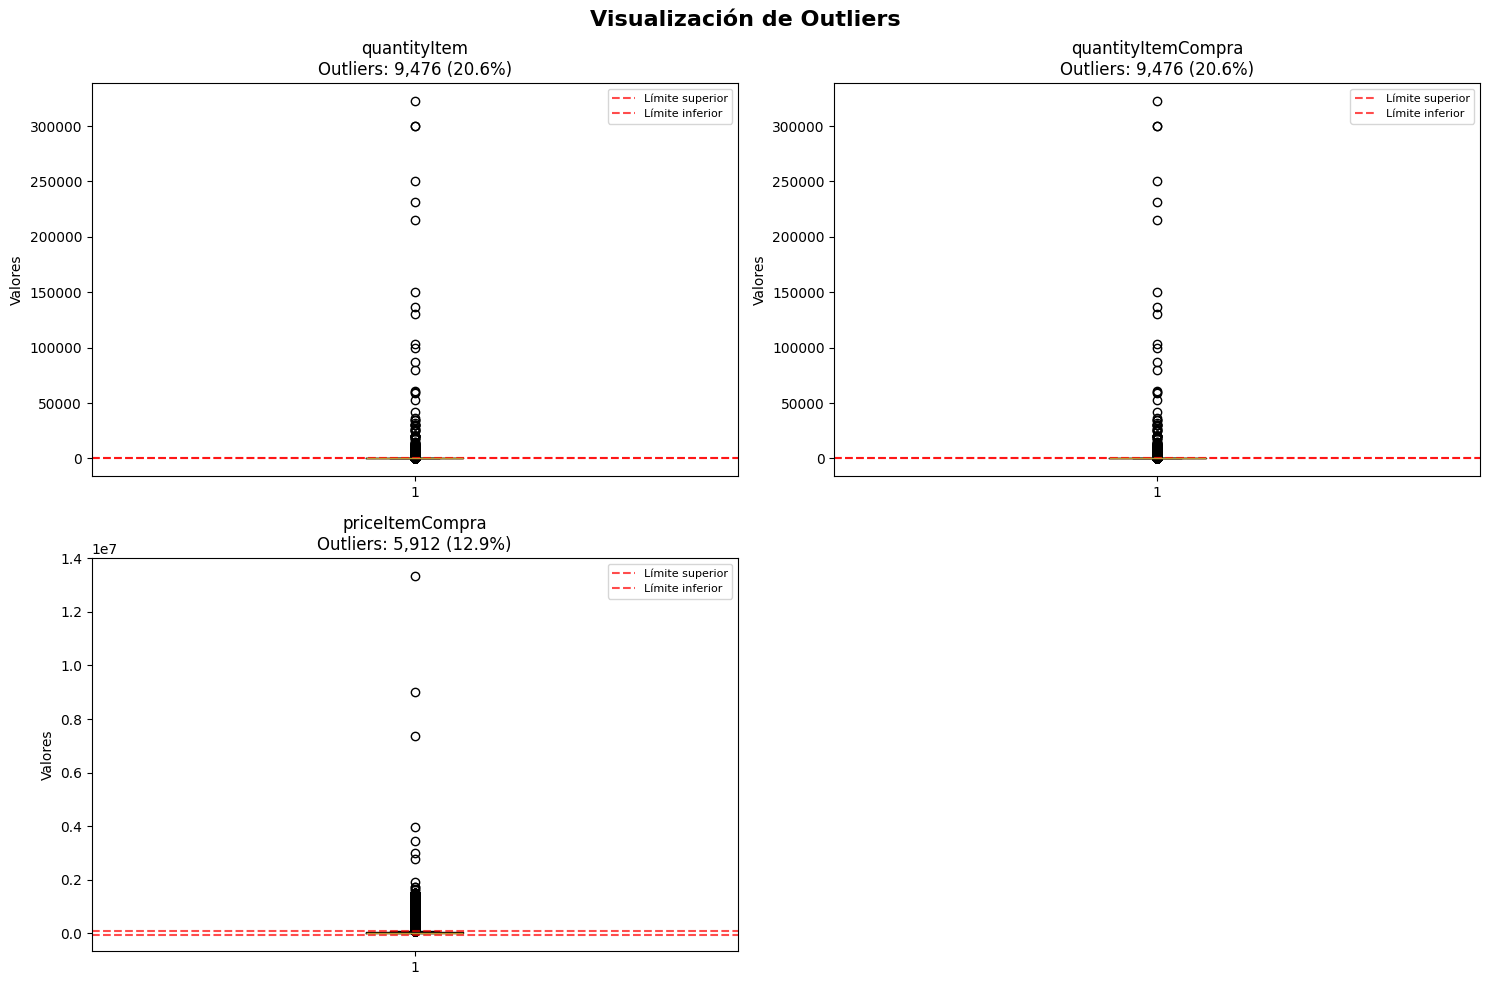


Análisis de outliers completado


In [12]:
def detect_outliers_iqr(column_data, column_name):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    
    return {
        'column': column_name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_percentage': (len(outliers) / len(column_data)) * 100,
        'outliers_values': outliers.values if len(outliers) <= 10 else outliers.head(10).values
    }

print("ANÁLISIS DE OUTLIERS")
print("=" * 50)

numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_summary = []

if len(numeric_columns) > 0:
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            outlier_info = detect_outliers_iqr(data, col)
            outlier_summary.append(outlier_info)
            
            print(f"\n{col}:")
            print(f"   • Rango normal: [{outlier_info['lower_bound']:.2f}, {outlier_info['upper_bound']:.2f}]")
            print(f"   • Outliers detectados: {outlier_info['outliers_count']:,} ({outlier_info['outliers_percentage']:.2f}%)")
            
            if outlier_info['outliers_count'] > 0:
                print(f"   • Algunos valores atípicos: {outlier_info['outliers_values'][:5]}")
    
    # Resumen general
    total_outliers = sum(info['outliers_count'] for info in outlier_summary)
    print(f"\nRESUMEN DE OUTLIERS:")
    print("-" * 30)
    print(f"   • Total de outliers detectados: {total_outliers:,}")
    print(f"   • Variables con outliers: {sum(1 for info in outlier_summary if info['outliers_count'] > 0)}")
    
    # Variable con más outliers
    if outlier_summary:
        max_outliers = max(outlier_summary, key=lambda x: x['outliers_count'])
        print(f"   • Variable con más outliers: {max_outliers['column']} ({max_outliers['outliers_count']:,})")
else:
    print("No hay variables numéricas para analizar outliers")

#Visualización de outliers
if len(numeric_columns) > 0:
    # Seleccionar variables con outliers para visualizar
    vars_with_outliers = [info for info in outlier_summary if info['outliers_count'] > 0]
    
    if vars_with_outliers:
        n_vars = min(len(vars_with_outliers), 4)  # Máximo 4 variables
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Visualización de Outliers', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for i, var_info in enumerate(vars_with_outliers[:n_vars]):
            col_name = var_info['column']
            data = df[col_name].dropna()
            
            # Boxplot
            axes[i].boxplot(data, vert=True)
            axes[i].set_title(f'{col_name}\nOutliers: {var_info["outliers_count"]:,} ({var_info["outliers_percentage"]:.1f}%)')
            axes[i].set_ylabel('Valores')
            
            # Agregar líneas de referencia
            axes[i].axhline(y=var_info['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Límite superior')
            axes[i].axhline(y=var_info['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Límite inferior')
            axes[i].legend(fontsize=8)
        
        # Ocultar subplots no usados
        for i in range(n_vars, 4):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No se detectaron outliers significativos en las variables numéricas.")
else:
    print("No hay variables numéricas para visualizar outliers")

print(f"\nAnálisis de outliers completado")

## **FASE 5: VISUALIZACIONES EXPLORATORIAS**

Paso 5.1: Distribuciones de variables numéricas

Generando gráficos para 4 variables


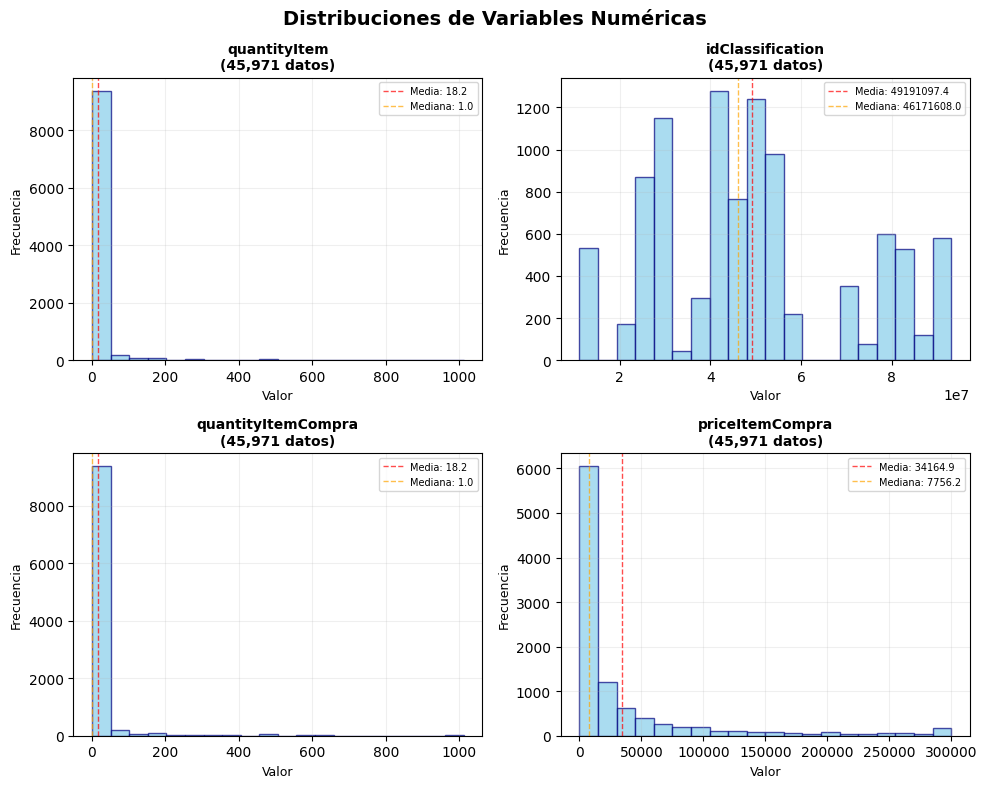


Análisis de distribuciones completado


In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    
    # Limitar a máximo 6 variables para visualización rápida
    viz_columns = numeric_columns[:6]
    if len(numeric_columns) > 6:
        print(f"Mostrando las primeras 6 de {len(numeric_columns)} variables para optimizar rendimiento")
    
    n_vars = len(viz_columns)
    
    if n_vars > 0:
        # Layout optimizado
        if n_vars <= 2:
            rows, cols = 1, 2
            figsize = (10, 5)
        elif n_vars <= 4:
            rows, cols = 2, 2  
            figsize = (10, 8)
        else:
            rows, cols = 2, 3
            figsize = (12, 8)
        
        print(f"Generando gráficos para {len(viz_columns)} variables")
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        fig.suptitle('Distribuciones de Variables Numéricas', fontsize=14, fontweight='bold')
        
        # Asegurar que axes sea siempre un array
        if n_vars == 1:
            axes = [axes]
        elif rows * cols > 1:
            axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
        
        # Procesar cada variable de forma optimizada
        for i, col in enumerate(viz_columns):
            ax = axes[i] if len(axes) > 1 else axes
            
            data = df[col].dropna()
            if len(data) > 0:
                # Usar muestra más pequeña para mayor velocidad
                if len(data) > 10000:
                    data_sample = data.sample(n=10000, random_state=42)
                
                else:
                    data_sample = data
                
                # Filtrar outliers para mejor visualización (método rápido)
                if len(data_sample) > 100:
                    q99 = data_sample.quantile(0.99)
                    q01 = data_sample.quantile(0.01)
                    data_viz = data_sample[(data_sample >= q01) & (data_sample <= q99)]
                else:
                    data_viz = data_sample
                
                # Crear histograma simple (sin KDE para mayor velocidad)
                try:
                    ax.hist(data_viz, bins=20, alpha=0.7, color='skyblue', edgecolor='navy')
                    
                    # Agregar solo estadísticas básicas
                    mean_val = data_viz.mean()
                    median_val = data_viz.median()
                    
                    # Líneas verticales simples
                    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                              linewidth=1, label=f'Media: {mean_val:.1f}')
                    ax.axvline(median_val, color='orange', linestyle='--', alpha=0.7, 
                              linewidth=1, label=f'Mediana: {median_val:.1f}')
                    
                    # Personalización mínima
                    ax.set_title(f'{col}\n({len(data):,} datos)', fontsize=10, fontweight='bold')
                    ax.set_xlabel('Valor', fontsize=9)
                    ax.set_ylabel('Frecuencia', fontsize=9)
                    ax.legend(fontsize=7)
                    ax.grid(True, alpha=0.2)
                    
                except Exception as e:
                    print(f"      ⚠️ Error graficando {col}: {str(e)[:50]}")
                    ax.text(0.5, 0.5, f'Error al\ngraficar {col}', ha='center', va='center', 
                           transform=ax.transAxes, fontsize=10)
            else:
                ax.text(0.5, 0.5, f'Sin datos\nen {col}', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=10)
                ax.set_title(col, fontsize=10, fontweight='bold')
        
        # Ocultar subplots no usados
        for i in range(len(viz_columns), rows*cols):
            if i < len(axes):
                axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()        
else:
    print("No se encontraron variables numéricas para graficar")

print(f"\nAnálisis de distribuciones completado")

Paso 5.2: Análisis de correlaciones

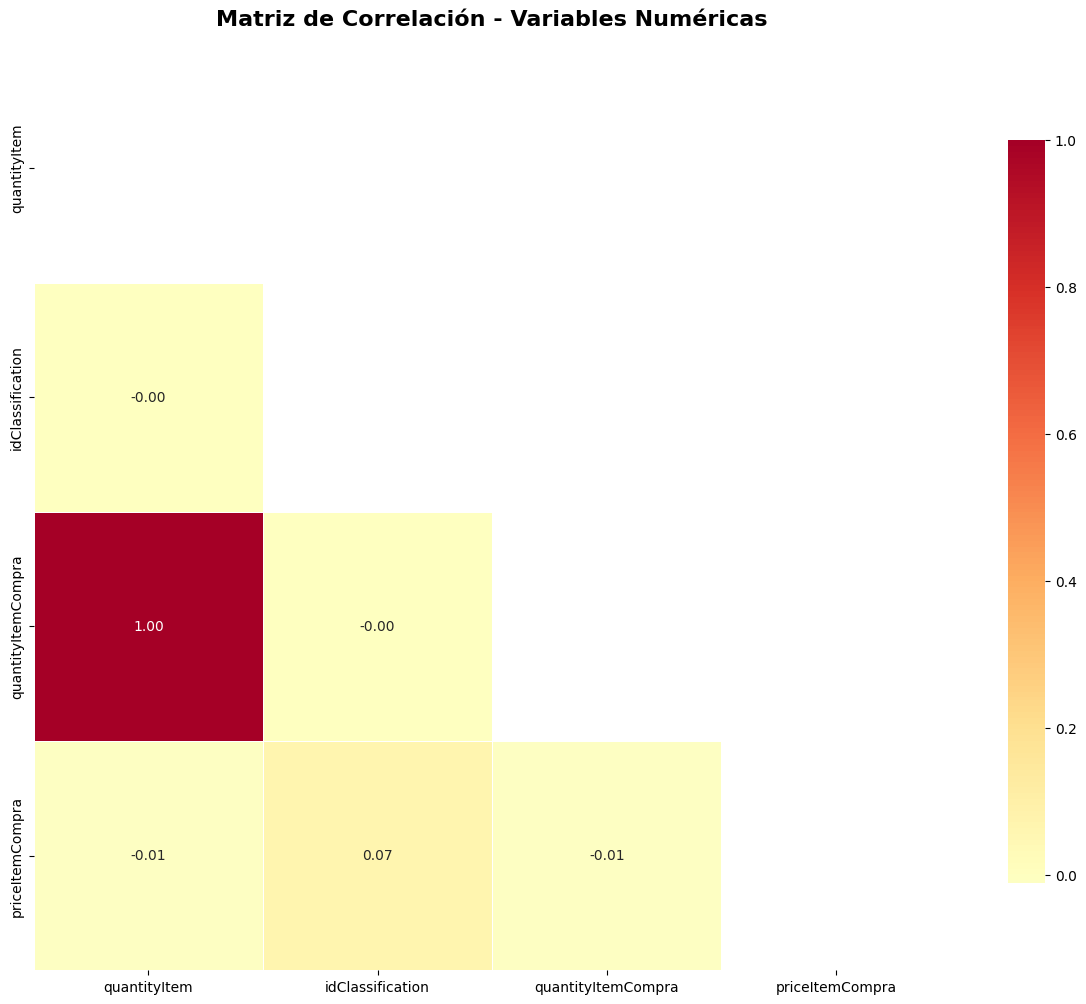


CORRELACIONES MÁS RELEVANTES:
---------------------------------------------
Top 6 correlaciones más fuertes:
    1. quantityItem         ↔ quantityItemCompra  :  1.000 MUY FUERTE Positiva
    2. idClassification     ↔ priceItemCompra     :  0.071 MUY DÉBIL Positiva
    3. quantityItem         ↔ priceItemCompra     : -0.012 MUY DÉBIL Negativa
    4. quantityItemCompra   ↔ priceItemCompra     : -0.012 MUY DÉBIL Negativa
    5. quantityItem         ↔ idClassification    : -0.004 MUY DÉBIL Negativa
    6. idClassification     ↔ quantityItemCompra  : -0.004 MUY DÉBIL Negativa


In [14]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) >= 2:
    # Calcular matriz de correlación
    corr_matrix = df[numeric_columns].corr()
    
    # Visualización de matriz de correlación
    plt.figure(figsize=(12, 10))
    
    # Crear máscara para la matriz triangular superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Generar mapa de calor
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True, 
                fmt='.2f',
                cbar_kws={"shrink": .8},
                linewidths=0.5)
    
    plt.title('Matriz de Correlación - Variables Numéricas', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Encontrar correlaciones más fuertes
    print(f"\nCORRELACIONES MÁS RELEVANTES:")
    print("-" * 45)
    
    # Obtener pares de correlaciones (excluyendo diagonal)
    correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            
            if not pd.isna(corr_value):
                correlations.append((var1, var2, corr_value))
    
    # Ordenar por valor absoluto de correlación
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Mostrar top correlaciones
    top_n = min(10, len(correlations))
    if correlations:
        print(f"Top {top_n} correlaciones más fuertes:")
        for i, (var1, var2, corr) in enumerate(correlations[:top_n]):
            strength = ""
            if abs(corr) >= 0.8:
                strength = "MUY FUERTE"
            elif abs(corr) >= 0.6:
                strength = "FUERTE"
            elif abs(corr) >= 0.4:
                strength = "MODERADA"
            elif abs(corr) >= 0.2:
                strength = "DÉBIL"
            else:
                strength = "MUY DÉBIL"
            
            direction = "Positiva" if corr > 0 else "Negativa"
            print(f"   {i+1:2d}. {var1:<20} ↔ {var2:<20}: {corr:6.3f} {strength} {direction}")
        
        # Estadísticas de correlación
        strong_corr = len([c for c in correlations if abs(c[2]) >= 0.6])
        moderate_corr = len([c for c in correlations if 0.4 <= abs(c[2]) < 0.6])
        weak_corr = len([c for c in correlations if 0.2 <= abs(c[2]) < 0.4])
        
    else:
        print(" No se pudieron calcular correlaciones válidas")
    
else:
    print(f"Se necesitan al menos 2 variables numéricas para correlaciones (encontradas: {len(numeric_columns)})")
    if len(numeric_columns) > 0:
        print(f"Variables numéricas disponibles: {list(numeric_columns)}")

Paso 5.3: Variables categóricas - Frecuencias y distribuciones


Variable: descriptionItem
------------------------------
   • Valores únicos: 44,579
   • Valores nulos: 1 (0.0%)
   • Total registros: 45,971

   Top 15 valores más frecuentes:
       1. Ninguna                       :     147 (  0.3%)
       2. Toner                         :      33 (  0.1%)
       3. SILLA EJECUTIVA               :      31 (  0.1%)
       4. LIBRETAS, BOTES Y BOLSAS, p...:      30 (  0.1%)
       5. Bolsas de cemento Bijao.      :      23 (  0.1%)
       6. MICROONDAS                    :      19 (  0.0%)
       7. Licencia Microsoft Office     :      13 (  0.0%)
       8. Se solicita cotización  par...:      13 (  0.0%)
       9. Solicitar invitación a coti...:      12 (  0.0%)
      10. SILLA SEMI EJECUTIVA          :      12 (  0.0%)
      11. Mano de Obra                  :      11 (  0.0%)
      12. Mantenimiento de Aire Acond...:      11 (  0.0%)
      13. Almuerzos con refresco incl...:      10 (  0.0%)
      14. ARCHIVO DE METAL CON 4 GAVE...:       9 (  0

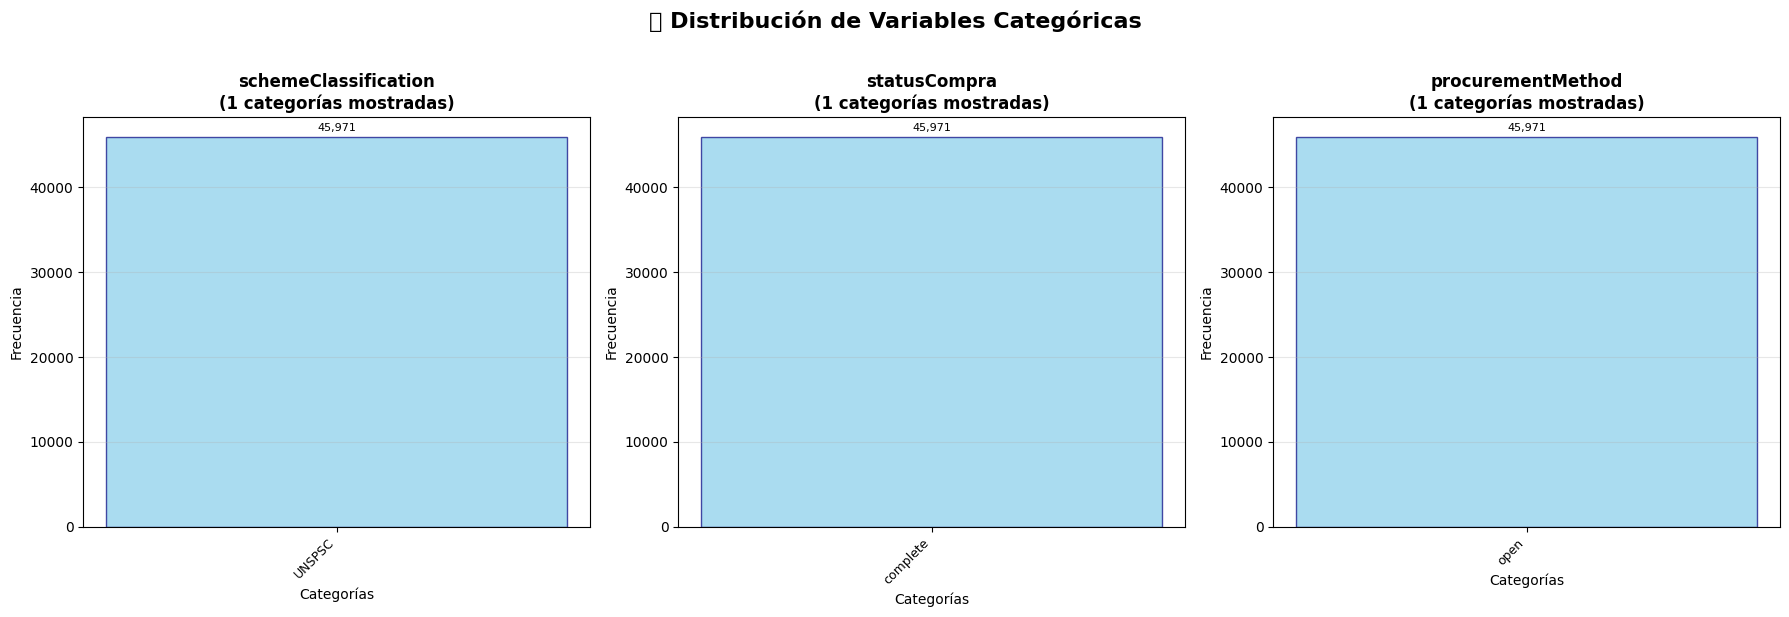

In [15]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) > 0:
    # Análisis de cada variable categórica
    for col in categorical_columns:
        print(f"\nVariable: {col}")
        print("-" * 30)
        
        # Contar valores únicos y frecuencias
        value_counts = df[col].value_counts(dropna=False)
        null_count = df[col].isnull().sum()
        unique_count = df[col].nunique()
        
        print(f"   • Valores únicos: {unique_count:,}")
        print(f"   • Valores nulos: {null_count:,} ({null_count/len(df)*100:.1f}%)")
        print(f"   • Total registros: {len(df):,}")
        
        # Mostrar top valores si no son demasiados
        if unique_count <= 20:
            print(f"\n   Distribución completa:")
            for i, (value, count) in enumerate(value_counts.head(20).items()):
                pct = count / len(df) * 100
                # Manejo de valores nulos
                display_value = " VALOR NULO" if pd.isna(value) else str(value)
                if len(display_value) > 30:
                    display_value = display_value[:27] + "..."
                print(f"      {i+1:2d}. {display_value:<30}: {count:7,} ({pct:5.1f}%)")
        else:
            print(f"\n   Top 15 valores más frecuentes:")
            for i, (value, count) in enumerate(value_counts.head(15).items()):
                pct = count / len(df) * 100
                display_value = "VALOR NULO" if pd.isna(value) else str(value)
                if len(display_value) > 30:
                    display_value = display_value[:27] + "..."
                print(f"      {i+1:2d}. {display_value:<30}: {count:7,} ({pct:5.1f}%)")
            
            if unique_count > 15:
                print(f"      ... y {unique_count-15:,} valores más")
        
        
    # Visualización de variables categóricas (máximo 3)
    viz_columns = [col for col in categorical_columns if df[col].nunique() <= 20][:3]
    
    if viz_columns:
        print(f"\nVISUALIZACIÓN DE VARIABLES CATEGÓRICAS")
        print("=" * 50)
        
        # Configurar subplots
        n_plots = len(viz_columns)
        if n_plots == 1:
            fig, axes = plt.subplots(1, 1, figsize=(10, 6))
            axes = [axes]
        else:
            fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 6))
        
        fig.suptitle('📊 Distribución de Variables Categóricas', 
                     fontsize=16, fontweight='bold', y=1.02)
        
        for i, col in enumerate(viz_columns):
            ax = axes[i]
            
            # Obtener datos para graficar
            value_counts = df[col].value_counts().head(15)  # Top 15 para evitar sobrecarga
            
            # Crear gráfico de barras
            bars = ax.bar(range(len(value_counts)), value_counts.values, 
                         color='skyblue', alpha=0.7, edgecolor='navy')
            
            # Personalizar gráfico
            ax.set_title(f'{col}\n({len(value_counts)} categorías mostradas)', 
                        fontsize=12, fontweight='bold')
            ax.set_xlabel('Categorías', fontsize=10)
            ax.set_ylabel('Frecuencia', fontsize=10)
            
            # Etiquetas del eje X
            labels = [str(label)[:15] + "..." if len(str(label)) > 15 else str(label) 
                     for label in value_counts.index]
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
            
            # Añadir valores en las barras
            for bar, value in zip(bars, value_counts.values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
                       f'{value:,}', ha='center', va='bottom', fontsize=8)
            
            ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
          
    else:
        print("\n Variables categóricas tienen demasiados valores únicos para visualizar eficientemente")
    
else:
    print(" No se encontraron variables categóricas para analizar")

## **FASE 6: ANÁLISIS EXPLORATORIO ESPECIALIZADO**

Paso 6.1: Análisis temporal (si hay columnas de fecha)

Columnas temporales detectadas: ['startDateTender', 'endDateTender', 'endDateEnquiry', 'startDateEnquiry', 'dateCompra']

Analizando columna temporal: startDateTender
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-04 13:10:00
    Fecha máxima: 2025-01-09 08:38:00
    Rango temporal: 676 días (1.9 años)
    Registros con fecha: 45,971
    Registros sin fecha: 0

    Distribución por año:
      2023: 47 registros (0.1%)
      2024: 45,921 registros (99.9%)
      2025: 3 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

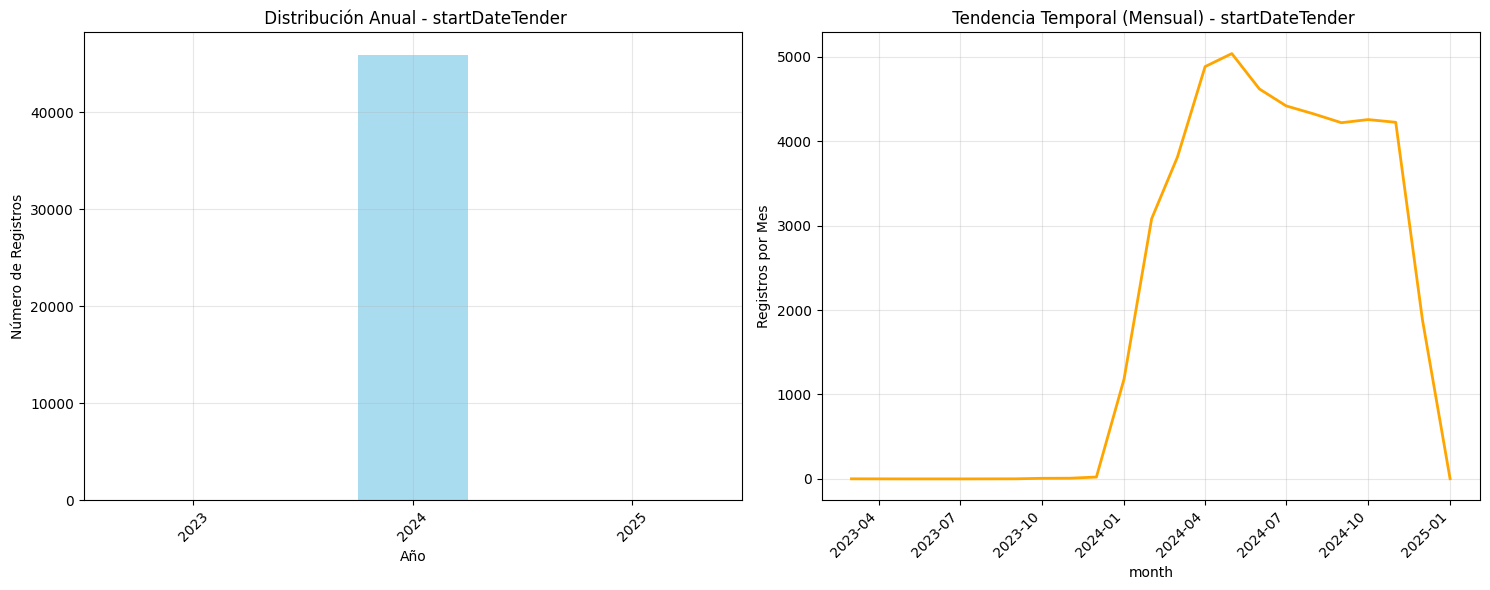


   Patrones detectados:
      • Día más activo: Tuesday (22.4%)
      • Mes más activo: May (11.0%)

Analizando columna temporal: endDateTender
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-30 12:00:00
    Fecha máxima: 2025-01-16 08:38:00
    Rango temporal: 657 días (1.8 años)
    Registros con fecha: 45,971
    Registros sin fecha: 0

    Distribución por año:
      2023: 42 registros (0.1%)
      2024: 45,919 registros (99.9%)
      2025: 10 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

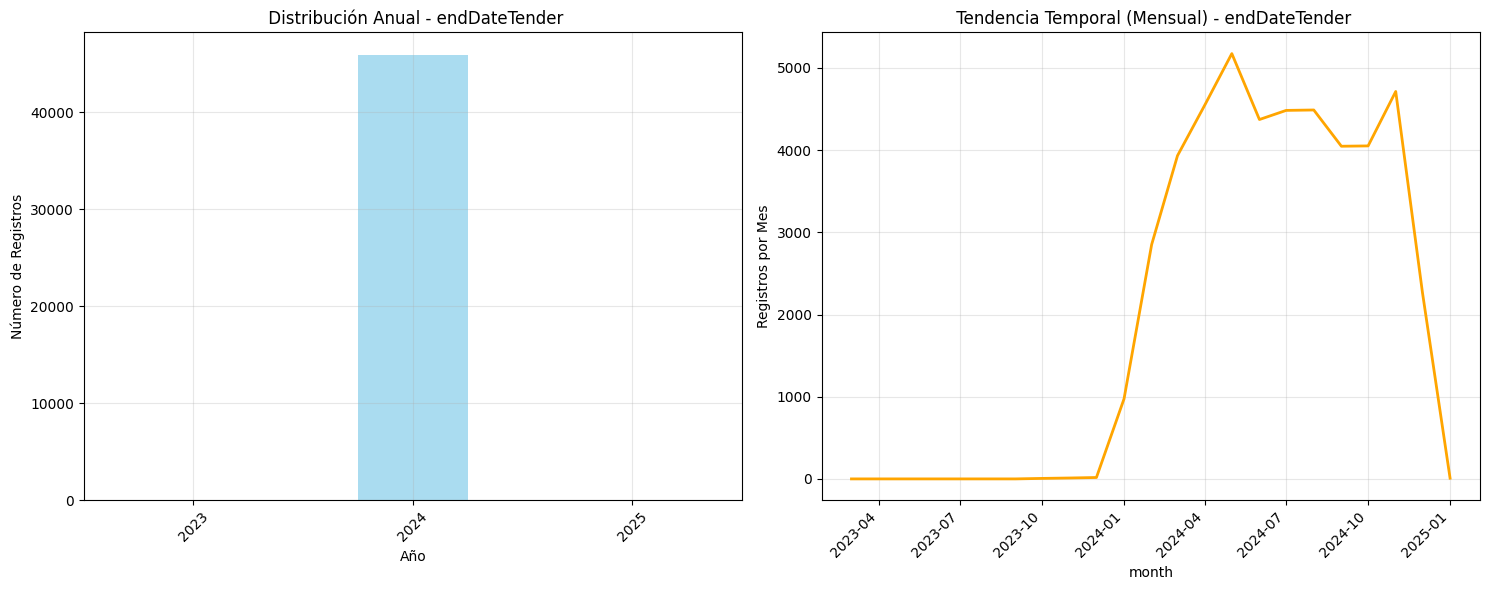


   Patrones detectados:
      • Día más activo: Friday (22.3%)
      • Mes más activo: May (11.3%)

Analizando columna temporal: endDateEnquiry
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-30 12:00:00
    Fecha máxima: 2025-01-16 08:38:00
    Rango temporal: 657 días (1.8 años)
    Registros con fecha: 45,971
    Registros sin fecha: 0

    Distribución por año:
      2023: 42 registros (0.1%)
      2024: 45,919 registros (99.9%)
      2025: 10 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

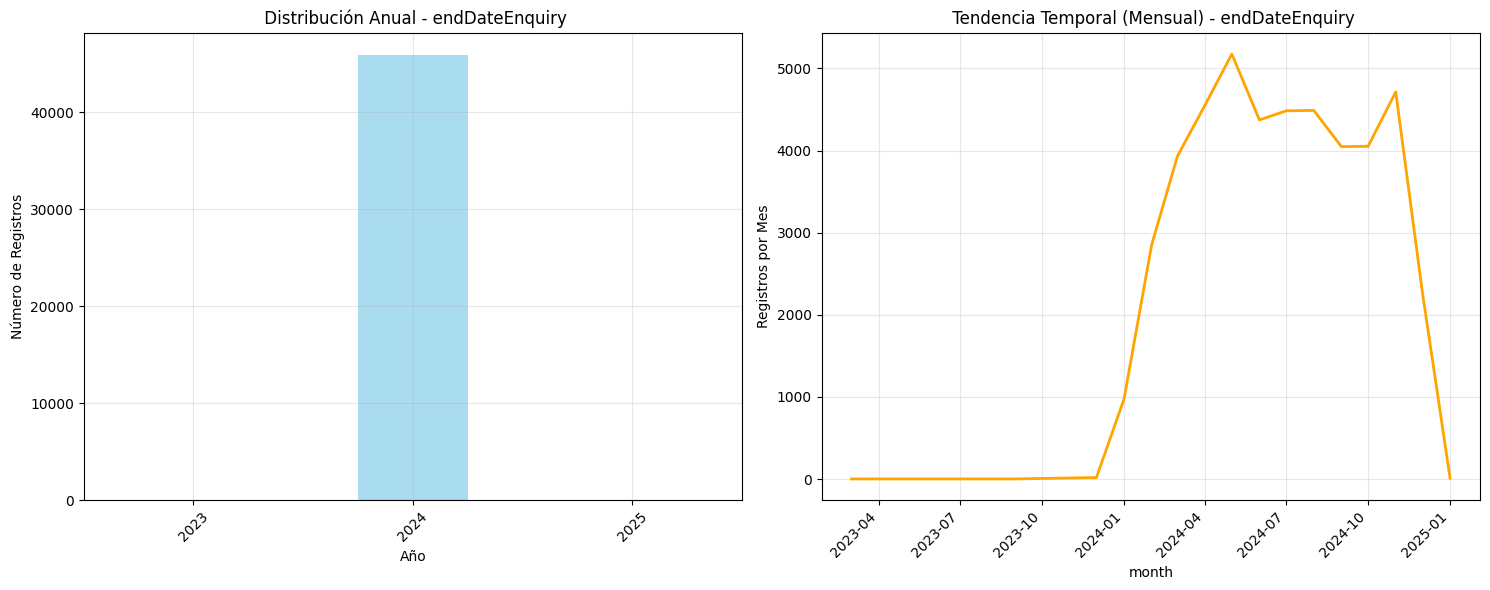


   Patrones detectados:
      • Día más activo: Friday (22.3%)
      • Mes más activo: May (11.3%)

Analizando columna temporal: startDateEnquiry
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2023-03-04 13:10:00
    Fecha máxima: 2025-01-09 08:38:00
    Rango temporal: 676 días (1.9 años)
    Registros con fecha: 45,971
    Registros sin fecha: 0

    Distribución por año:
      2023: 47 registros (0.1%)
      2024: 45,921 registros (99.9%)
      2025: 3 registros (0.0%)


<Figure size 1200x600 with 0 Axes>

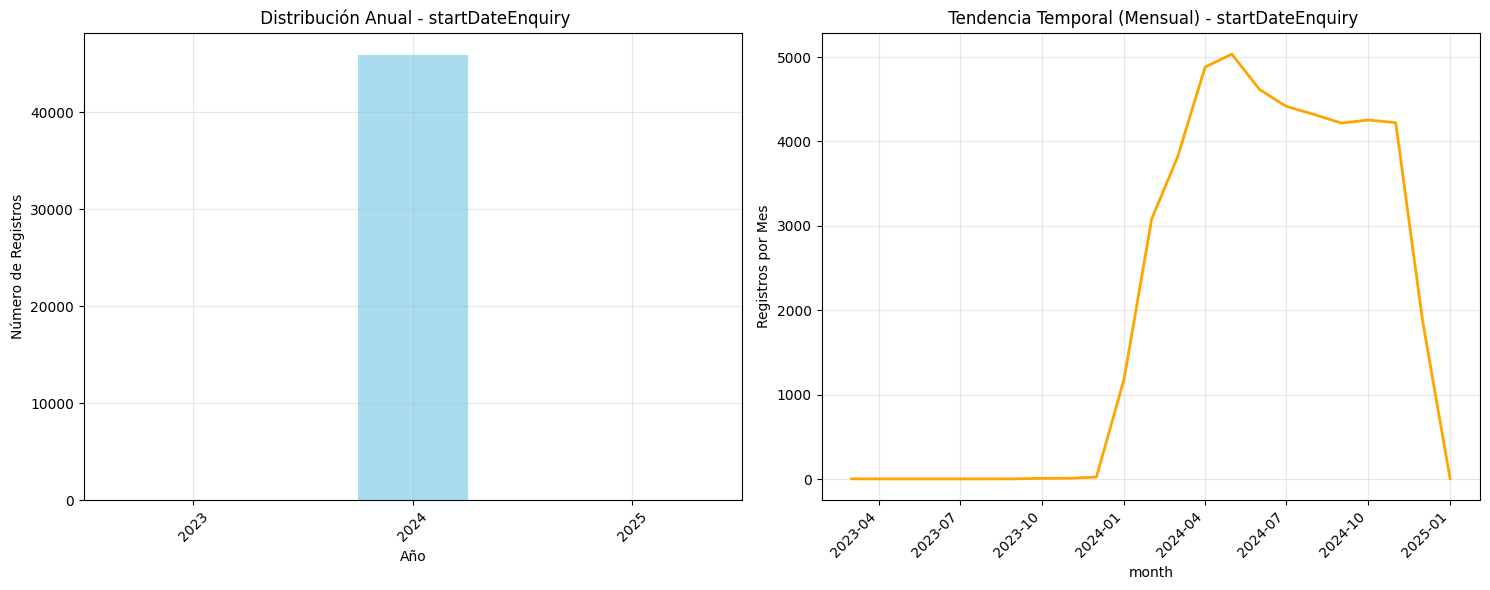


   Patrones detectados:
      • Día más activo: Tuesday (22.4%)
      • Mes más activo: May (11.0%)

Analizando columna temporal: dateCompra
-----------------------------------
   Columna convertida a datetime
    Fecha mínima: 2024-01-02 08:55:00
    Fecha máxima: 2024-12-31 13:26:00
    Rango temporal: 364 días (1.0 años)
    Registros con fecha: 45,971
    Registros sin fecha: 0

    Distribución por año:
      2024: 45,971 registros (100.0%)


<Figure size 1200x600 with 0 Axes>

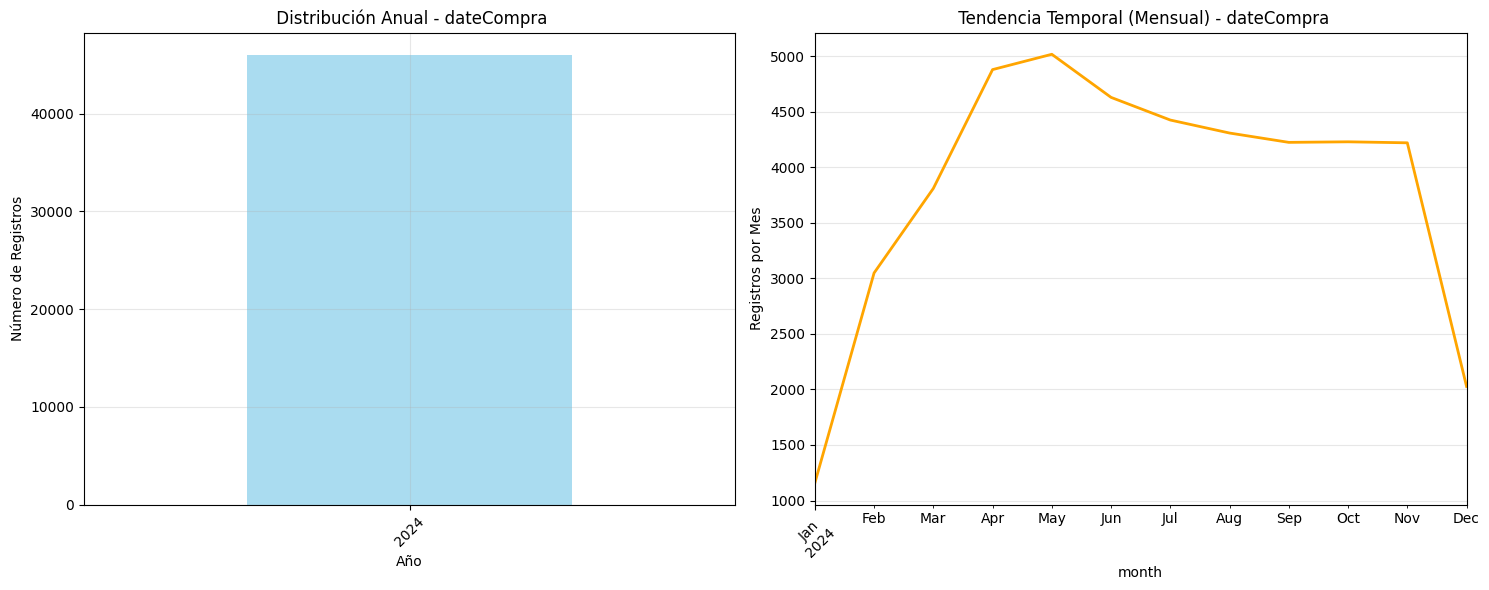


   Patrones detectados:
      • Día más activo: Tuesday (22.7%)
      • Mes más activo: May (10.9%)

 Análisis temporal completado


In [16]:
# Buscar columnas de fecha/tiempo
date_columns = []
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]' or 'date' in col.lower() or 'time' in col.lower():
        date_columns.append(col)
    # Intentar convertir columnas que podrían ser fechas
    elif df[col].dtype == 'object':
        try:
            # Verificar si es una fecha en formato string
            sample = df[col].dropna().head(100)
            if len(sample) > 0:
                test_conversion = pd.to_datetime(sample.iloc[0], errors='coerce')
                if pd.notna(test_conversion):
                    # Verificar si más del 80% se puede convertir
                    converted = pd.to_datetime(sample, errors='coerce')
                    if converted.notna().sum() / len(sample) > 0.8:
                        date_columns.append(col)
        except:
            pass

if date_columns:
    print(f"Columnas temporales detectadas: {date_columns}")
    
    # Analizar cada columna temporal
    for col in date_columns:
        print(f"\nAnalizando columna temporal: {col}")
        print("-" * 35)
        
        # Convertir a datetime si no lo está
        if df[col].dtype != 'datetime64[ns]':
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print("   Columna convertida a datetime")
            except:
                print("   Error al convertir a datetime")
                continue
        
        # Estadísticas temporales
        date_series = df[col].dropna()
        if len(date_series) > 0:
            min_date = date_series.min()
            max_date = date_series.max()
            date_range = max_date - min_date
            
            print(f"    Fecha mínima: {min_date}")
            print(f"    Fecha máxima: {max_date}")
            print(f"    Rango temporal: {date_range.days} días ({date_range.days/365.25:.1f} años)")
            print(f"    Registros con fecha: {len(date_series):,}")
            print(f"    Registros sin fecha: {df[col].isnull().sum():,}")
            
            # Análisis de distribución temporal
            if len(date_series) > 100:  # Solo si hay suficientes datos
                # Agrupar por año
                df_temp = date_series.to_frame()
                df_temp['year'] = df_temp[col].dt.year
                yearly_counts = df_temp['year'].value_counts().sort_index()
                
                print(f"\n    Distribución por año:")
                for year, count in yearly_counts.items():
                    pct = count / len(date_series) * 100
                    print(f"      {year}: {count:,} registros ({pct:.1f}%)")
                
                # Visualización temporal
                plt.figure(figsize=(12, 6))
                
                # Crear dos subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
                
                # Gráfico 1: Distribución por año
                yearly_counts.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
                ax1.set_title(f' Distribución Anual - {col}')
                ax1.set_xlabel('Año')
                ax1.set_ylabel('Número de Registros')
                ax1.tick_params(axis='x', rotation=45)
                ax1.grid(True, alpha=0.3)
                
                # Gráfico 2: Línea temporal (muestra)
                if len(date_series) > 1000:
                    # Para datasets grandes, agrupar por mes
                    df_temp['month'] = df_temp[col].dt.to_period('M')
                    monthly_counts = df_temp['month'].value_counts().sort_index()
                    monthly_counts.index = monthly_counts.index.to_timestamp()
                    monthly_counts.plot(ax=ax2, color='orange', linewidth=2)
                    ax2.set_title(f' Tendencia Temporal (Mensual) - {col}')
                    ax2.set_ylabel('Registros por Mes')
                else:
                    # Para datasets pequeños, mostrar datos diarios
                    daily_counts = date_series.value_counts().sort_index()
                    daily_counts.plot(ax=ax2, color='green', alpha=0.7)
                    ax2.set_title(f' Distribución Diaria - {col}')
                    ax2.set_ylabel('Registros por Día')
                
                ax2.tick_params(axis='x', rotation=45)
                ax2.grid(True, alpha=0.3)
                
                plt.tight_layout()
                plt.show()
                
                # Análisis de patrones semanales/mensuales
                if len(date_series) > 365:
                    df_temp['weekday'] = df_temp[col].dt.day_name()
                    df_temp['month'] = df_temp[col].dt.month_name()
                    
                    weekday_counts = df_temp['weekday'].value_counts()
                    month_counts = df_temp['month'].value_counts()
                    
                    print(f"\n   Patrones detectados:")
                    
                    # Día de la semana más frecuente
                    most_common_day = weekday_counts.index[0]
                    day_pct = weekday_counts.iloc[0] / len(date_series) * 100
                    print(f"      • Día más activo: {most_common_day} ({day_pct:.1f}%)")
                    
                    # Mes más frecuente
                    most_common_month = month_counts.index[0]
                    month_pct = month_counts.iloc[0] / len(date_series) * 100
                    print(f"      • Mes más activo: {most_common_month} ({month_pct:.1f}%)")
        else:
            print("    No hay datos temporales válidos en esta columna")

else:
    print(" No se detectaron columnas temporales en el dataset")

print(f"\n Análisis temporal completado")

Paso 6.2: Análisis de segmentación y clustering básico

Variables numéricas seleccionadas: ['quantityItem', 'idClassification', 'quantityItemCompra', 'priceItemCompra']

 Determinando número óptimo de clusters...

 Determinando número óptimo de clusters...
Aplicando K-Means con k=2

ANÁLISIS DE CLUSTERS (k=2):
----------------------------------------

   CLUSTER 0:
      • Tamaño: 19,995 registros (100.0%)
      • quantityItem: 93.77  (-42.8% vs promedio)
      • quantityItemCompra: 93.77  (-42.8% vs promedio)

   CLUSTER 1:
      • Tamaño: 5 registros (0.0%)
      • quantityItem: 280715.80  (+171149.0% vs promedio)
      • quantityItemCompra: 280715.80  (+171149.0% vs promedio)
      • priceItemCompra: 0.97  (-100.0% vs promedio)

 PCA aplicado - Varianza explicada:
   • PC1: 50.0%
   • PC2: 26.9%
   • Total: 76.9%
Aplicando K-Means con k=2

ANÁLISIS DE CLUSTERS (k=2):
----------------------------------------

   CLUSTER 0:
      • Tamaño: 19,995 registros (100.0%)
      • quantityItem: 93.77  (-42.8% vs promedio)
      • quantityItemCompr

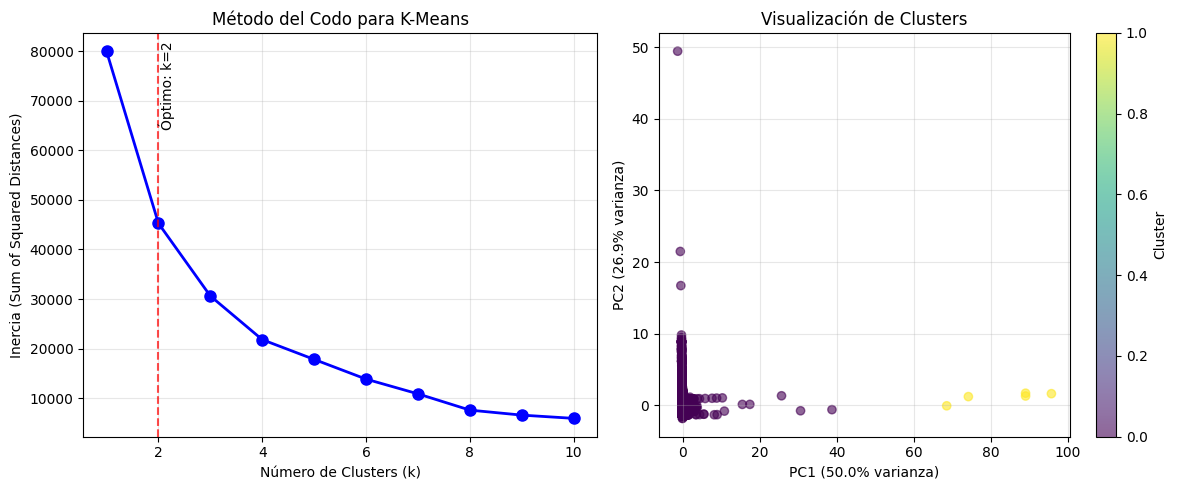


 Análisis de segmentación completado
   Se identificaron 2 grupos naturales en los datos


In [17]:
# Seleccionar variables numéricas para clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if df[col].notna().sum() > len(df)*0.5]  # Al menos 50% datos

if len(numeric_cols) >= 2:
    print(f"Variables numéricas seleccionadas: {list(numeric_cols)}")
    
    # Preparar datos para clustering
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    
    # Tomar muestra si el dataset es muy grande
    sample_size = min(20000, len(df))
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
        
    else:
        df_sample = df.copy()

    
    # Preparar matriz de datos
    X = df_sample[numeric_cols].fillna(df_sample[numeric_cols].median())
    
    # Estandarizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Determinar número óptimo de clusters usando método del codo
    print("\n Determinando número óptimo de clusters...")
    inertias = []
    K_range = range(1, min(11, len(df_sample)//100 + 2))  # Hasta 10 clusters o según tamaño
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Visualizar método del codo
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Método del codo
    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia (Sum of Squared Distances)')
    plt.title('Método del Codo para K-Means')
    plt.grid(True, alpha=0.3)
    
    # Encontrar el codo automáticamente
    if len(inertias) > 2:
        # Calcular segunda derivada para encontrar el codo
        second_deriv = []
        for i in range(1, len(inertias)-1):
            second_deriv.append(inertias[i-1] - 2*inertias[i] + inertias[i+1])
        
        if second_deriv:
            optimal_k = second_deriv.index(max(second_deriv)) + 2
            plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
            plt.text(optimal_k, max(inertias)*0.8, f'Óptimo: k={optimal_k}', 
                    rotation=90, verticalalignment='bottom')
        else:
            optimal_k = 3  # Por defecto
    else:
        optimal_k = 3
    
    # Realizar clustering con k óptimo
    print(f"Aplicando K-Means con k={optimal_k}")
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans_final.fit_predict(X_scaled)
    
    # Añadir clusters al dataframe de muestra
    df_sample_copy = df_sample.copy()
    df_sample_copy['Cluster'] = clusters
    
    # Análisis de clusters
    print(f"\nANÁLISIS DE CLUSTERS (k={optimal_k}):")
    print("-" * 40)
    
    cluster_summary = df_sample_copy.groupby('Cluster')[numeric_cols].agg(['count', 'mean', 'std'])
    
    for cluster_id in range(optimal_k):
        cluster_data = df_sample_copy[df_sample_copy['Cluster'] == cluster_id]
        cluster_size = len(cluster_data)
        cluster_pct = cluster_size / len(df_sample_copy) * 100
        
        print(f"\n   CLUSTER {cluster_id}:")
        print(f"      • Tamaño: {cluster_size:,} registros ({cluster_pct:.1f}%)")
        
        # Características principales del cluster
        for col in numeric_cols:
            mean_val = cluster_data[col].mean()
            overall_mean = df_sample_copy[col].mean()
            diff_pct = ((mean_val - overall_mean) / overall_mean * 100) if overall_mean != 0 else 0
            
            if abs(diff_pct) > 20:  # Solo mostrar diferencias significativas
                direction = "" if diff_pct > 0 else ""
                print(f"      • {col}: {mean_val:.2f} {direction} ({diff_pct:+.1f}% vs promedio)")
    
    # Visualización de clusters (PCA si hay más de 2 variables)
    plt.subplot(1, 2, 2)
    
    if len(numeric_cols) == 2:
        # Si solo hay 2 variables, graficar directamente
        scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(f'{numeric_cols[0]} (estandarizado)')
        plt.ylabel(f'{numeric_cols[1]} (estandarizado)')
    else:
        # Si hay más de 2 variables, usar PCA para reducir a 2D
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
        
        print(f"\n PCA aplicado - Varianza explicada:")
        print(f"   • PC1: {pca.explained_variance_ratio_[0]:.1%}")
        print(f"   • PC2: {pca.explained_variance_ratio_[1]:.1%}")
        print(f"   • Total: {sum(pca.explained_variance_ratio_):.1%}")
    
    plt.title('Visualización de Clusters')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Análisis de segmentación completado")
    print(f"   Se identificaron {optimal_k} grupos naturales en los datos")
    
else:
    print(" Se necesitan al menos 2 variables numéricas con datos suficientes")

## **FASE 7: ANÁLISIS DE PRODUCTOS**

Paso 7.1: Análisis de productos más demandados

Análisis completado. Top 10 de 5014 productos únicos


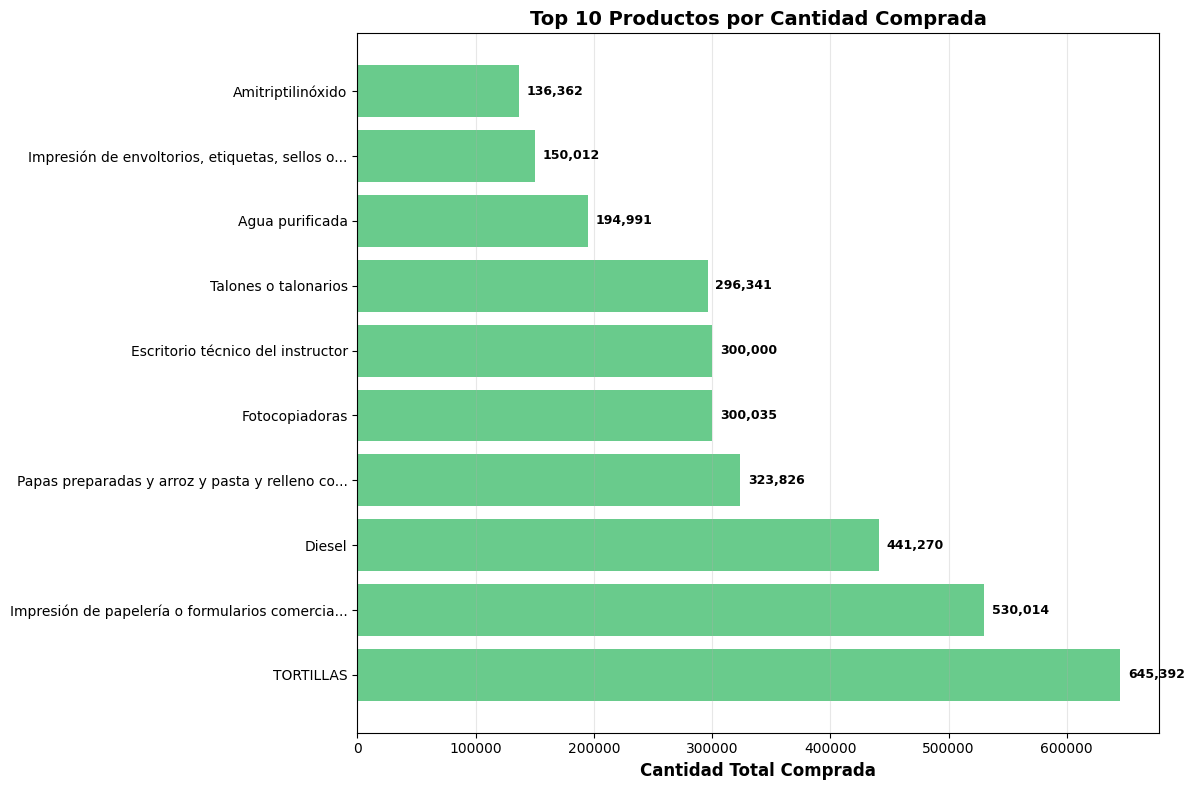


TOP 5 PRODUCTOS MÁS DEMANDADOS:
#   Producto                            Cantidad        Órdenes   
-----------------------------------------------------------------
4489 TORTILLAS                                645,392       10
2394 Impresión de papelería o formular..      530,014      211
1658 Diesel                                   441,270      176
3188 Papas preparadas y arroz y pasta ..      323,826      257
2120 Fotocopiadoras                           300,035       32


In [18]:
if 'descriptionClassification' in df.columns and 'quantityItemCompra' in df.columns:
    # OPTIMIZACIÓN 1: Usar sample si el dataset es muy grande
    df_sample = df.sample(n=min(50000, len(df)), random_state=42) if len(df) > 50000 else df
    
    #OPTIMIZACIÓN 2: Groupby más eficiente con menos operaciones
    product_metrics = df_sample.groupby("descriptionClassification", as_index=False).agg({
        'quantityItemCompra': 'sum',
        'idTender': 'count'  # Más rápido que count en quantity
    }).rename(columns={
        'quantityItemCompra': 'total_quantity',
        'idTender': 'num_orders'
    })
    
    # Ordenar y tomar top 10
    top_products = product_metrics.nlargest(10, 'total_quantity')
    
    print(f"Análisis completado. Top 10 de {len(product_metrics)} productos únicos")
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Gráfico de barras simple y rápido
    y_pos = range(len(top_products))
    bars = ax.barh(y_pos, top_products['total_quantity'], 
                   color=plt.cm.viridis(0.7), alpha=0.8)
    
    # Configuración básica del gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels([prod[:45] + '...' if len(prod) > 45 else prod 
                        for prod in top_products['descriptionClassification']], fontsize=10)
    ax.set_xlabel('Cantidad Total Comprada', fontsize=12, fontweight='bold')
    ax.set_title('Top 10 Productos por Cantidad Comprada', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir solo las etiquetas más importantes (valores altos)
    max_value = top_products['total_quantity'].max()
    for i, value in enumerate(top_products['total_quantity']):
        if value > max_value * 0.1:  # Solo mostrar si es > 10% del máximo
            ax.text(value + max_value * 0.01, i, f'{value:,.0f}', 
                   va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # TABLA RESUMEN
    print("\nTOP 5 PRODUCTOS MÁS DEMANDADOS:")
    print("=" * 65)
    print(f"{'#':<3} {'Producto':<35} {'Cantidad':<15} {'Órdenes':<10}")
    print("-" * 65)
    
    for idx, row in top_products.head(5).iterrows():
        product_name = row['descriptionClassification']
        product_short = product_name[:33] + ".." if len(product_name) > 35 else product_name
        print(f"{idx+1:<3} {product_short:<35} {row['total_quantity']:>12,.0f} {row['num_orders']:>8,.0f}")
    
    
    
    # Guardar para uso posterior (opcional)
    globals()['top_products_analysis'] = top_products

else:
    print(" No se encontraron las columnas necesarias para análisis de productos")


### Paso 7.2: Análisis de compradores principales

Columnas detectadas:
  - Compradores: nameUnidadBuyer
  - Cantidades: quantityItem

Analizando 45,971 registros de compras válidos...
Compradores únicos encontrados: 298


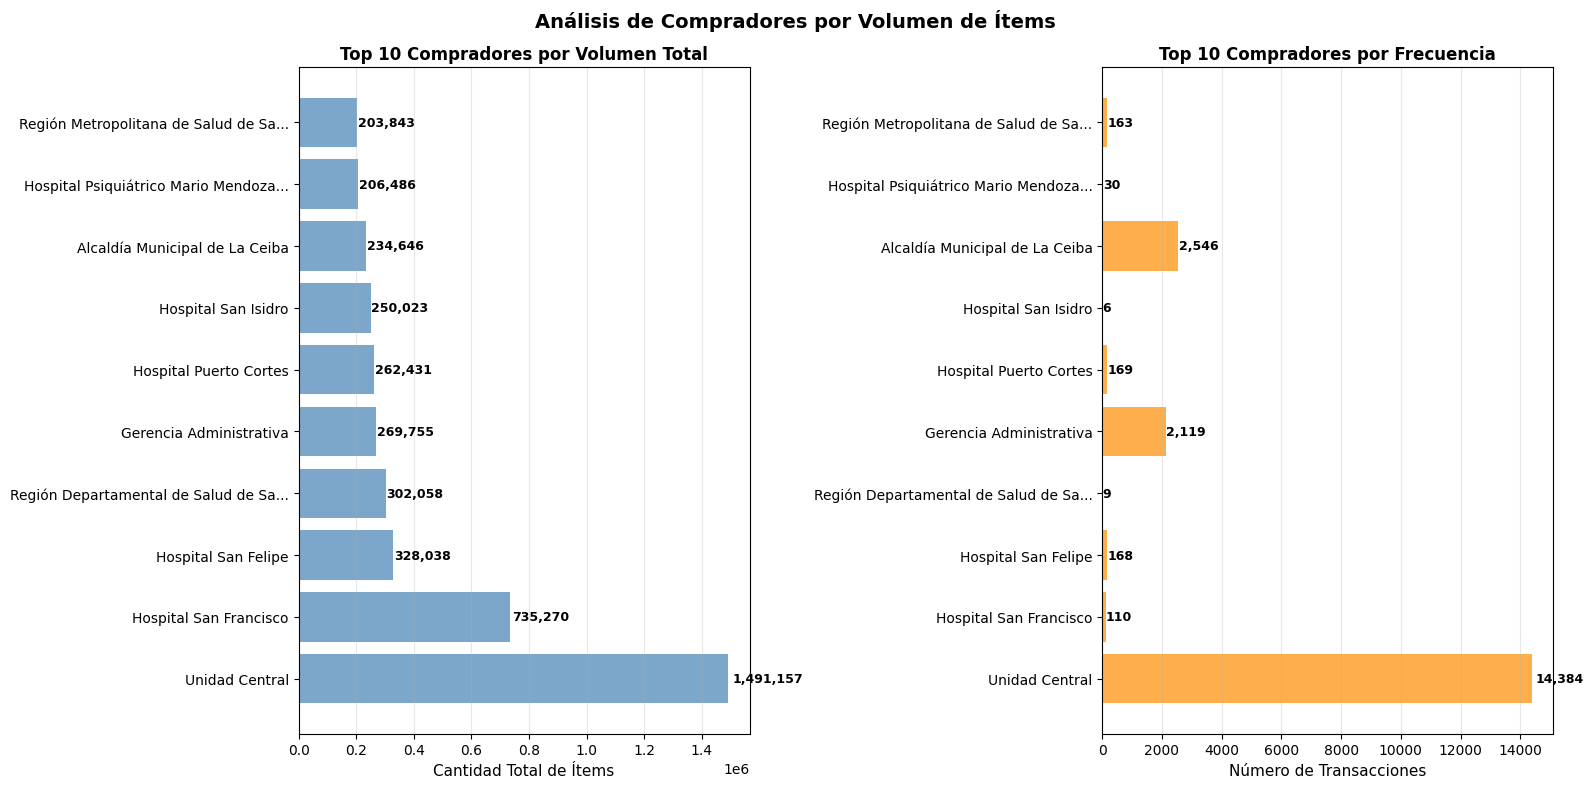


Top 5 Compradores por Volumen:
#   Comprador                                Cantidad Total  Transacciones   Promedio/Trans 
-------------------------------------------------------------------------------------
1   Unidad Central                              1,491,157        14,384         103.7
2   Hospital San Francisco                        735,270           110       6,684.3
3   Hospital San Felipe                           328,038           168       1,952.6
4   Región Departamental de Salud de Santa..      302,058             9      33,562.0
5   Gerencia Administrativa                       269,755         2,119         127.3
 


In [19]:
# Detectar columnas disponibles automáticamente
buyer_col = None
quantity_col = None

# Buscar columna de compradores (preferir nombre antes que ID)
for col in df.columns:
    if 'nameunidadbuyer' in col.lower() or 'namebuyer' in col.lower():
        buyer_col = col
        break
    elif 'idunidadbuyer' in col.lower() or 'buyer' in col.lower():
        buyer_col = col

# Buscar columna de cantidad
for col in df.columns:
    if 'quantityitem' in col.lower() or 'quantity' in col.lower():
        if df[col].dtype in ['float64', 'int64']:
            quantity_col = col
            break

print(f"Columnas detectadas:")
print(f"  - Compradores: {buyer_col}")
print(f"  - Cantidades: {quantity_col}")

if buyer_col and quantity_col:
    # Preparar datos para análisis
    df_analysis = df[[buyer_col, quantity_col]].copy()
    
    # Limpiar datos nulos y valores no válidos
    df_analysis = df_analysis.dropna(subset=[buyer_col, quantity_col])
    df_analysis = df_analysis[df_analysis[quantity_col] > 0]  # Solo cantidades positivas
    
    print(f"\nAnalizando {len(df_analysis):,} registros de compras válidos...")
    
    # Análisis de compradores por cantidad total de ítems
    buyer_metrics = df_analysis.groupby(buyer_col).agg({
        quantity_col: ['sum', 'count', 'mean']
    }).round(2)
    
    # Aplanar nombres de columnas
    buyer_metrics.columns = ['total_quantity', 'num_transactions', 'avg_quantity']
    buyer_metrics = buyer_metrics.sort_values('total_quantity', ascending=False)
    
    print(f"Compradores únicos encontrados: {len(buyer_metrics):,}")
    
    # Top 10 compradores por cantidad total
    top_10_buyers = buyer_metrics.head(10)
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Análisis de Compradores por Volumen de Ítems', fontsize=14, fontweight='bold')
    
    # Gráfico 1: Cantidad total de ítems
    y_positions = range(len(top_10_buyers))
    bars1 = ax1.barh(y_positions, top_10_buyers['total_quantity'], 
                     color='steelblue', alpha=0.7)
    
    ax1.set_yticks(y_positions)
    ax1.set_yticklabels([str(name)[:35] + '...' if len(str(name)) > 35 else str(name) 
                        for name in top_10_buyers.index], fontsize=10)
    ax1.set_xlabel('Cantidad Total de Ítems', fontsize=11)
    ax1.set_title('Top 10 Compradores por Volumen Total', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, value in enumerate(top_10_buyers['total_quantity']):
        ax1.text(value * 1.01, i, f'{value:,.0f}', 
                va='center', fontsize=9, fontweight='bold')
    
    # Gráfico 2: Número de transacciones
    bars2 = ax2.barh(y_positions, top_10_buyers['num_transactions'], 
                     color='darkorange', alpha=0.7)
    
    ax2.set_yticks(y_positions)
    ax2.set_yticklabels([str(name)[:35] + '...' if len(str(name)) > 35 else str(name) 
                        for name in top_10_buyers.index], fontsize=10)
    ax2.set_xlabel('Número de Transacciones', fontsize=11)
    ax2.set_title('Top 10 Compradores por Frecuencia', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, value in enumerate(top_10_buyers['num_transactions']):
        ax2.text(value * 1.01, i, f'{value:,.0f}', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Tabla resumen
    print("\nTop 5 Compradores por Volumen:")
    print("=" * 85)
    print(f"{'#':<3} {'Comprador':<40} {'Cantidad Total':<15} {'Transacciones':<15} {'Promedio/Trans':<15}")
    print("-" * 85)
    
    for i, (buyer, row) in enumerate(top_10_buyers.head(5).iterrows(), 1):
        buyer_name = str(buyer)[:38] + ".." if len(str(buyer)) > 40 else str(buyer)
        print(f"{i:<3} {buyer_name:<40} {row['total_quantity']:>12,.0f} "
              f"{row['num_transactions']:>13,.0f} {row['avg_quantity']:>13,.1f}")
    
    
    
else:
    print("No se pudieron encontrar las columnas necesarias para el análisis de compradores.")
    print("Columnas disponibles en el dataset:")
    for col in df.columns:
        print(f"  - {col}")

print(" ")

---
## **FASE 8: ANÁLISIS ESPECÍFICO - TORTILLAS** 

Paso 8.1: Análisis Integral de TORTILLAS

In [20]:
# Filtrar todas las compras de TORTILLAS
tortillas_data = df[df['descriptionItem'].str.contains('TORTILLAS', case=False, na=False)].copy()

print(f"Registros encontrados para TORTILLAS: {len(tortillas_data):,}")

if len(tortillas_data) > 0:
    # Información básica
    total_quantity = tortillas_data['quantityItem'].sum()
    total_orders = len(tortillas_data)
    avg_quantity_per_order = total_quantity / total_orders
    
    print(f"\nMÉTRICAS PRINCIPALES:")
    print(f"   • Cantidad total comprada: {total_quantity:,.0f} unidades")
    print(f"   • Número total de órdenes: {total_orders:,}")
    
    # Análisis temporal
    print(f"\nANÁLISIS TEMPORAL:")
    if 'startDateTender' in tortillas_data.columns:
        # Convertir fecha si no está ya convertida
        if tortillas_data['startDateTender'].dtype == 'object':
            tortillas_data['startDateTender'] = pd.to_datetime(tortillas_data['startDateTender'], errors='coerce')
        
        # Filtrar fechas válidas
        valid_dates = tortillas_data['startDateTender'].dropna()
        
        if len(valid_dates) > 0:
            fecha_min = valid_dates.min()
            fecha_max = valid_dates.max()
            rango_dias = (fecha_max - fecha_min).days
            
            print(f"   • Período de compras: {fecha_min.strftime('%Y-%m-%d')} a {fecha_max.strftime('%Y-%m-%d')}")
            print(f"   • Rango temporal: {rango_dias} días")
            
            # Análisis por año
            tortillas_data['year'] = tortillas_data['startDateTender'].dt.year
            yearly_summary = tortillas_data.groupby('year').agg({
                'quantityItem': ['count', 'sum'],
                'startDateTender': 'count'
            }).fillna(0)
            
            yearly_summary.columns = ['ordenes', 'cantidad_total', 'registros']
            yearly_summary = yearly_summary.sort_index()
            
            print(f"\n   Compras por año:")
            for year, row in yearly_summary.iterrows():
                if pd.notna(year):
                    print(f"      {int(year)}: {int(row['ordenes']):,} órdenes, {int(row['cantidad_total']):,} unidades")
    
    # Análisis de proveedores
    print(f"\nANÁLISIS DE PROVEEDORES:")
    if 'nameSupplier' in tortillas_data.columns:
        proveedores = tortillas_data.groupby('nameSupplier').agg({
            'quantityItem': ['sum', 'count', 'mean'],
            'ocidCompra': 'nunique'  # Contratos únicos
        }).round(1)
        
        proveedores.columns = ['cantidad_total', 'ordenes', 'promedio_orden', 'contratos_unicos']
        proveedores = proveedores.sort_values('cantidad_total', ascending=False)
        
        print(f"   • Número de proveedores: {len(proveedores)}")
        
    
    # Análisis de compradores
    print(f"\nANÁLISIS DE COMPRADORES:")
    if 'nameUnidadBuyer' in tortillas_data.columns:
        compradores = tortillas_data.groupby('nameUnidadBuyer').agg({
            'quantityItem': ['sum', 'count', 'mean']
        }).round(1)
        
        compradores.columns = ['cantidad_total', 'ordenes', 'promedio_orden']
        compradores = compradores.sort_values('cantidad_total', ascending=False)
        
        print(f"   • Número de compradores: {len(compradores)}")
        
    
    # Categorizar órdenes por tamaño
    q25 = tortillas_data['quantityItem'].quantile(0.25)
    q75 = tortillas_data['quantityItem'].quantile(0.75)
    
    ordenes_pequeñas = tortillas_data[tortillas_data['quantityItem'] <= q25]
    ordenes_medianas = tortillas_data[(tortillas_data['quantityItem'] > q25) & (tortillas_data['quantityItem'] <= q75)]
    ordenes_grandes = tortillas_data[tortillas_data['quantityItem'] > q75]
    
   
   
    
    # Guardar análisis para uso posterior
    globals()['tortillas_analysis'] = {
        'data': tortillas_data,
        'total_quantity': total_quantity,
        'total_orders': total_orders,
        'avg_per_order': avg_quantity_per_order
    }
    
else:
    print("No se encontraron datos para TORTILLAS")


Registros encontrados para TORTILLAS: 167

MÉTRICAS PRINCIPALES:
   • Cantidad total comprada: 646,145 unidades
   • Número total de órdenes: 167

ANÁLISIS TEMPORAL:
   • Período de compras: 2024-01-01 a 2024-12-12
   • Rango temporal: 346 días

   Compras por año:
      2024: 167 órdenes, 646,145 unidades

ANÁLISIS DE PROVEEDORES:
   • Número de proveedores: 109

ANÁLISIS DE COMPRADORES:
   • Número de compradores: 31


Paso 8.2: Visualizaciones Específicas de TORTILLAS

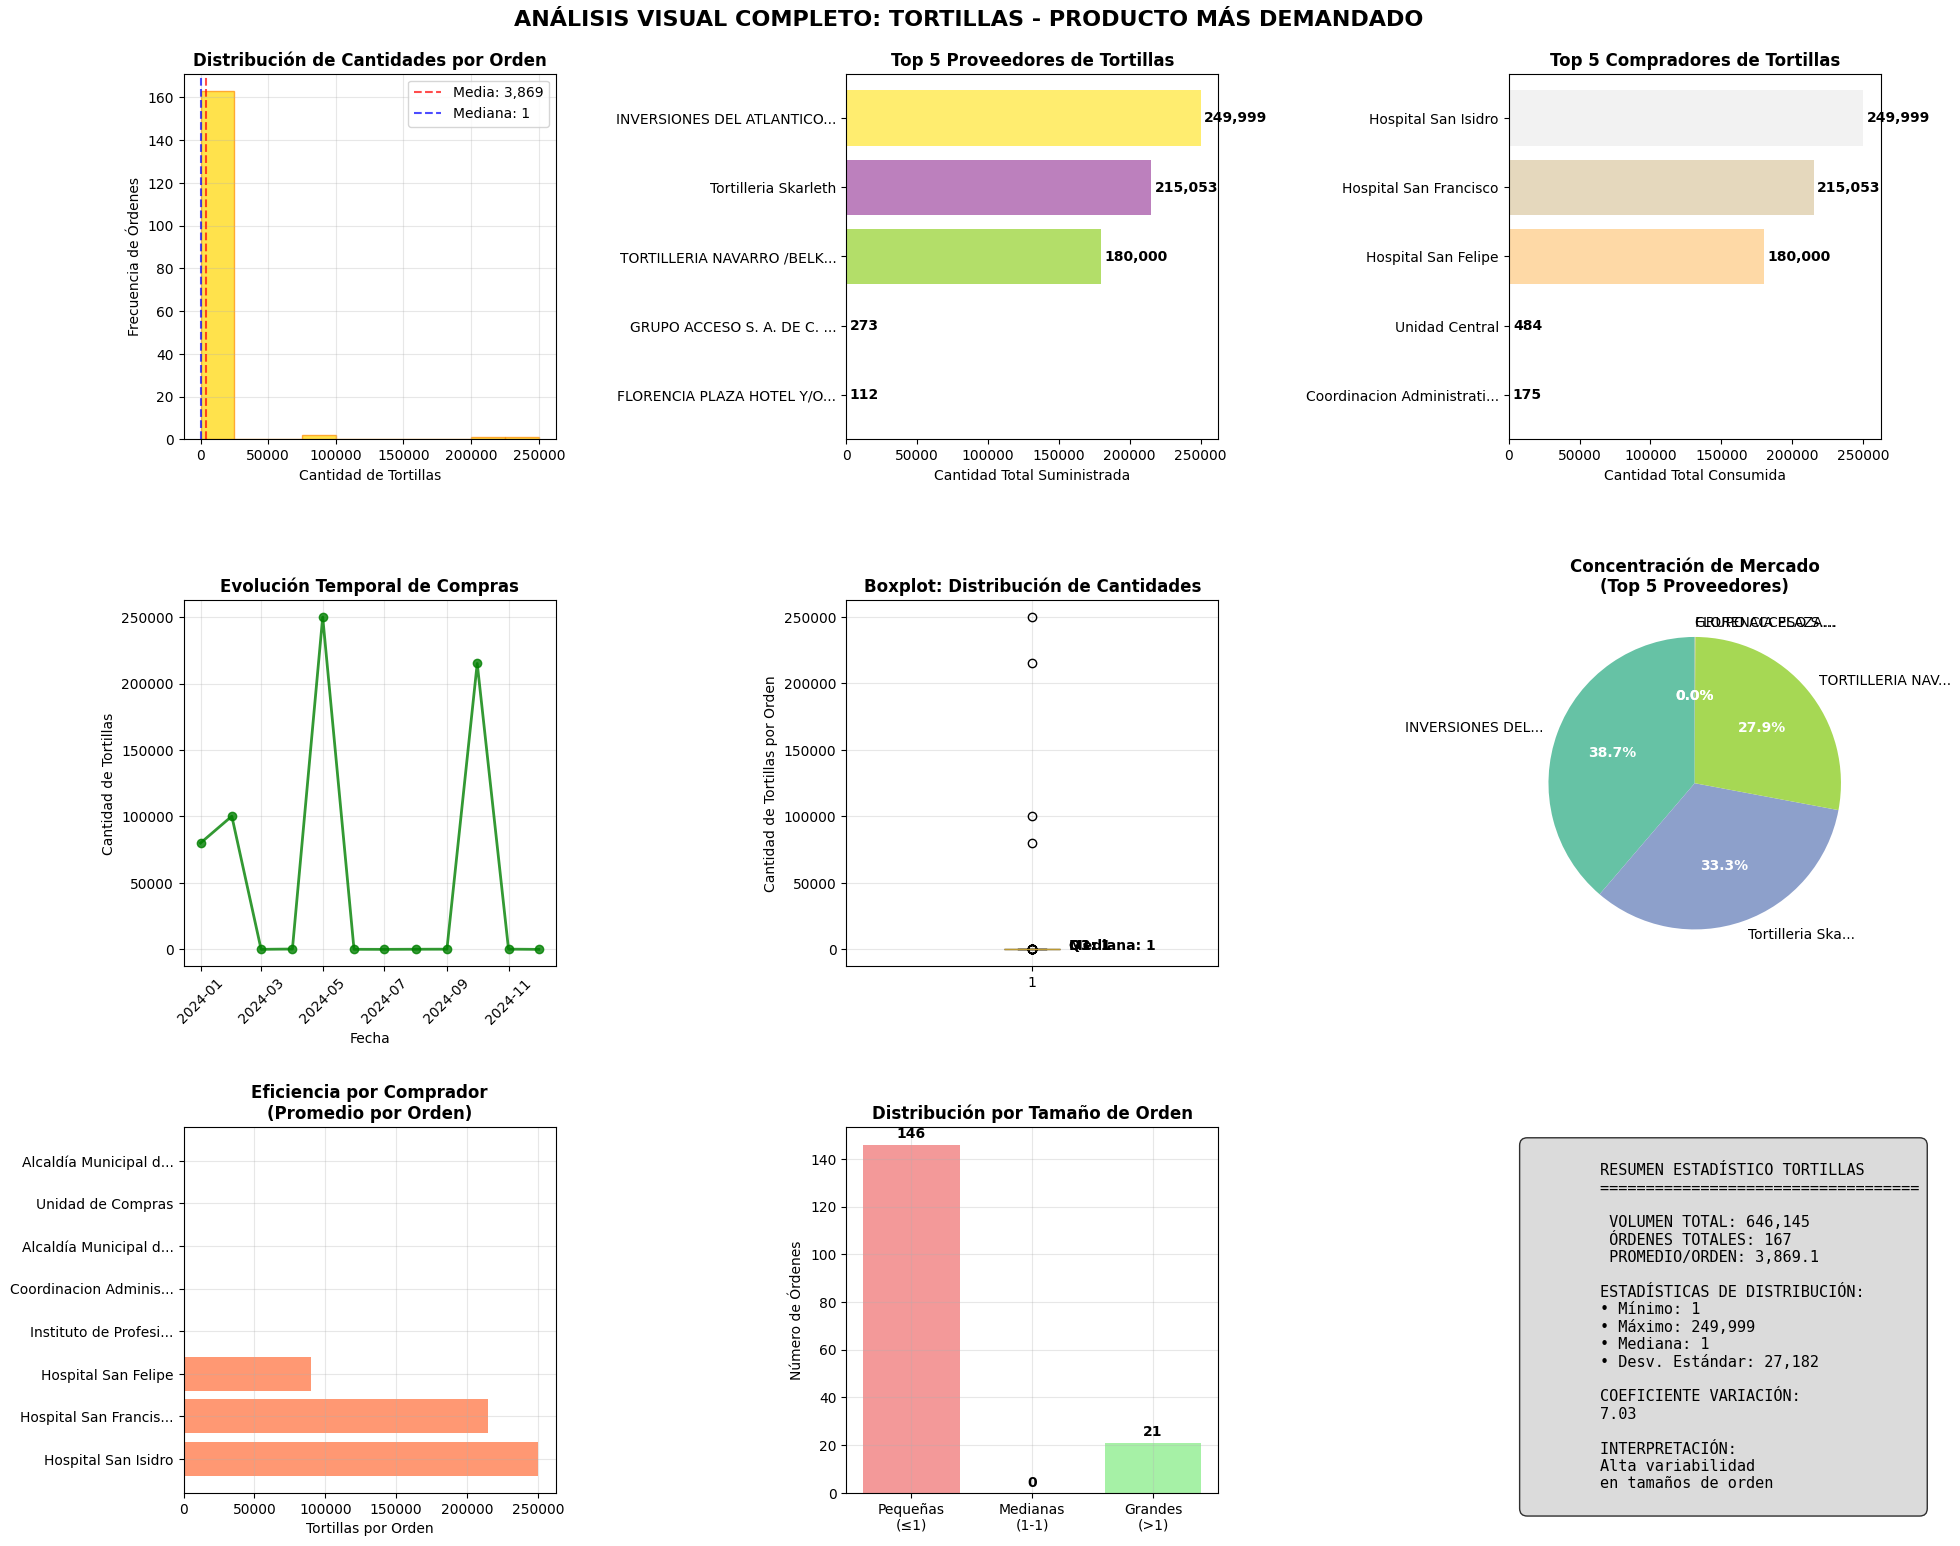

In [21]:
if 'tortillas_analysis' in globals() and len(tortillas_analysis['data']) > 0:
    tortillas_data = tortillas_analysis['data']
    
    # Configuración de la figura principal
    fig = plt.figure(figsize=(20, 16))
    
    # 1. DISTRIBUCIÓN DE CANTIDADES POR ORDEN
    plt.subplot(3, 3, 1)
    plt.hist(tortillas_data['quantityItem'], bins=min(10, len(tortillas_data)), 
             color='gold', alpha=0.7, edgecolor='darkorange')
    plt.title('Distribución de Cantidades por Orden', fontsize=12, fontweight='bold')
    plt.xlabel('Cantidad de Tortillas')
    plt.ylabel('Frecuencia de Órdenes')
    plt.grid(True, alpha=0.3)
    
    # Agregar líneas estadísticas
    mean_qty = tortillas_data['quantityItem'].mean()
    median_qty = tortillas_data['quantityItem'].median()
    plt.axvline(mean_qty, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_qty:,.0f}')
    plt.axvline(median_qty, color='blue', linestyle='--', alpha=0.7, label=f'Mediana: {median_qty:,.0f}')
    plt.legend(fontsize=10)
    
    # 2. TOP PROVEEDORES (si hay datos)
    if 'nameSupplier' in tortillas_data.columns:
        plt.subplot(3, 3, 2)
        top_suppliers = tortillas_data.groupby('nameSupplier')['quantityItem'].sum().sort_values(ascending=True).tail(5)
        
        if len(top_suppliers) > 0:
            colors = plt.cm.Set3(np.linspace(0, 1, len(top_suppliers)))
            bars = plt.barh(range(len(top_suppliers)), top_suppliers.values, color=colors)
            plt.yticks(range(len(top_suppliers)), 
                      [name[:25] + '...' if len(name) > 25 else name for name in top_suppliers.index])
            plt.title('Top 5 Proveedores de Tortillas', fontsize=12, fontweight='bold')
            plt.xlabel('Cantidad Total Suministrada')
            
            # Agregar etiquetas de valores
            for i, (bar, value) in enumerate(zip(bars, top_suppliers.values)):
                plt.text(value + max(top_suppliers.values) * 0.01, bar.get_y() + bar.get_height()/2,
                        f'{value:,.0f}', va='center', fontweight='bold', fontsize=10)
    
    # 3. TOP COMPRADORES (si hay datos)
    if 'nameUnidadBuyer' in tortillas_data.columns:
        plt.subplot(3, 3, 3)
        top_buyers = tortillas_data.groupby('nameUnidadBuyer')['quantityItem'].sum().sort_values(ascending=True).tail(5)
        
        if len(top_buyers) > 0:
            colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_buyers)))
            bars = plt.barh(range(len(top_buyers)), top_buyers.values, color=colors)
            plt.yticks(range(len(top_buyers)), 
                      [name[:25] + '...' if len(name) > 25 else name for name in top_buyers.index])
            plt.title('Top 5 Compradores de Tortillas', fontsize=12, fontweight='bold')
            plt.xlabel('Cantidad Total Consumida')
            
            # Agregar etiquetas de valores
            for i, (bar, value) in enumerate(zip(bars, top_buyers.values)):
                plt.text(value + max(top_buyers.values) * 0.01, bar.get_y() + bar.get_height()/2,
                        f'{value:,.0f}', va='center', fontweight='bold', fontsize=10)
    
    # 4. ANÁLISIS TEMPORAL (si hay fechas)
    if 'startDateTender' in tortillas_data.columns:
        plt.subplot(3, 3, 4)
        # Convertir fechas si es necesario
        if tortillas_data['startDateTender'].dtype == 'object':
            tortillas_data['startDateTender'] = pd.to_datetime(tortillas_data['startDateTender'], errors='coerce')
        
        valid_dates = tortillas_data.dropna(subset=['startDateTender'])
        
        if len(valid_dates) > 0:
            # Agrupar por mes
            valid_dates['year_month'] = valid_dates['startDateTender'].dt.to_period('M')
            monthly_data = valid_dates.groupby('year_month')['quantityItem'].sum()
            
            if len(monthly_data) > 1:
                monthly_data.index = monthly_data.index.to_timestamp()
                plt.plot(monthly_data.index, monthly_data.values, marker='o', linewidth=2, 
                        markersize=6, color='green', alpha=0.8)
                plt.title('Evolución Temporal de Compras', fontsize=12, fontweight='bold')
                plt.xlabel('Fecha')
                plt.ylabel('Cantidad de Tortillas')
                plt.xticks(rotation=45)
                plt.grid(True, alpha=0.3)
            else:
                plt.text(0.5, 0.5, 'Datos temporales\ninsuficientes', 
                        transform=plt.gca().transAxes, ha='center', va='center')
                plt.title('Evolución Temporal', fontsize=12, fontweight='bold')
    
    # 5. BOXPLOT DE DISTRIBUCIÓN
    plt.subplot(3, 3, 5)
    box_plot = plt.boxplot(tortillas_data['quantityItem'], patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7))
    plt.title('Boxplot: Distribución de Cantidades', fontsize=12, fontweight='bold')
    plt.ylabel('Cantidad de Tortillas por Orden')
    plt.grid(True, alpha=0.3)
    
    # Agregar estadísticas al boxplot
    stats = tortillas_data['quantityItem'].describe()
    plt.text(1.1, stats['75%'], f"Q3: {stats['75%']:,.0f}", fontweight='bold')
    plt.text(1.1, stats['50%'], f"Mediana: {stats['50%']:,.0f}", fontweight='bold')
    plt.text(1.1, stats['25%'], f"Q1: {stats['25%']:,.0f}", fontweight='bold')
    
    # 6. CONCENTRACIÓN DE MERCADO
    plt.subplot(3, 3, 6)
    if 'nameSupplier' in tortillas_data.columns:
        supplier_shares = tortillas_data.groupby('nameSupplier')['quantityItem'].sum()
        supplier_shares = supplier_shares.sort_values(ascending=False)
        
        # Calcular participación de mercado
        total_market = supplier_shares.sum()
        market_shares = (supplier_shares / total_market * 100).head(5)
        
        if len(market_shares) > 0:
            colors = plt.cm.Set2(np.linspace(0, 1, len(market_shares)))
            wedges, texts, autotexts = plt.pie(market_shares.values, 
                                             labels=[f"{name[:15]}..." if len(name) > 15 else name 
                                                    for name in market_shares.index],
                                             autopct='%1.1f%%', colors=colors, startangle=90)
            plt.title('Concentración de Mercado\n(Top 5 Proveedores)', fontsize=12, fontweight='bold')
            
            # Mejorar legibilidad
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
    
    # 7. EFICIENCIA DE ÓRDENES
    plt.subplot(3, 3, 7)
    if 'nameUnidadBuyer' in tortillas_data.columns:
        buyer_efficiency = tortillas_data.groupby('nameUnidadBuyer').agg({
            'quantityItem': ['count', 'sum']
        }).round(0)
        buyer_efficiency.columns = ['num_orders', 'total_quantity']
        buyer_efficiency['avg_per_order'] = buyer_efficiency['total_quantity'] / buyer_efficiency['num_orders']
        buyer_efficiency = buyer_efficiency.sort_values('avg_per_order', ascending=False).head(8)
        
        if len(buyer_efficiency) > 0:
            plt.barh(range(len(buyer_efficiency)), buyer_efficiency['avg_per_order'], 
                    color='coral', alpha=0.8)
            plt.yticks(range(len(buyer_efficiency)), 
                      [name[:20] + '...' if len(name) > 20 else name for name in buyer_efficiency.index])
            plt.title('Eficiencia por Comprador\n(Promedio por Orden)', fontsize=12, fontweight='bold')
            plt.xlabel('Tortillas por Orden')
            plt.grid(True, alpha=0.3)
    
    # 8. CATEGORÍAS DE ÓRDENES
    plt.subplot(3, 3, 8)
    q25 = tortillas_data['quantityItem'].quantile(0.25)
    q75 = tortillas_data['quantityItem'].quantile(0.75)
    
    small_orders = len(tortillas_data[tortillas_data['quantityItem'] <= q25])
    medium_orders = len(tortillas_data[(tortillas_data['quantityItem'] > q25) & 
                                      (tortillas_data['quantityItem'] <= q75)])
    large_orders = len(tortillas_data[tortillas_data['quantityItem'] > q75])
    
    categories = ['Pequeñas\n(≤' + f'{q25:,.0f})', 
                 'Medianas\n(' + f'{q25:,.0f}-{q75:,.0f})', 
                 'Grandes\n(>' + f'{q75:,.0f})']
    values = [small_orders, medium_orders, large_orders]
    colors = ['lightcoral', 'gold', 'lightgreen']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8)
    plt.title('Distribución por Tamaño de Orden', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Órdenes')
    plt.grid(True, alpha=0.3)
    
    # Agregar etiquetas de valores
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values) * 0.01,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 9. RESUMEN ESTADÍSTICO
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # Crear resumen estadístico visual
    stats_text = f"""
        RESUMEN ESTADÍSTICO TORTILLAS
        {'='*35}

         VOLUMEN TOTAL: {tortillas_analysis['total_quantity']:,.0f}
         ÓRDENES TOTALES: {tortillas_analysis['total_orders']:,}
         PROMEDIO/ORDEN: {tortillas_analysis['avg_per_order']:,.1f}

        ESTADÍSTICAS DE DISTRIBUCIÓN:
        • Mínimo: {tortillas_data['quantityItem'].min():,.0f}
        • Máximo: {tortillas_data['quantityItem'].max():,.0f}
        • Mediana: {tortillas_data['quantityItem'].median():,.0f}
        • Desv. Estándar: {tortillas_data['quantityItem'].std():,.0f}

        COEFICIENTE VARIACIÓN: 
        {tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean():.2f}
        
        INTERPRETACIÓN:
        {"Alta variabilidad" if tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean() > 1 else "Moderada variabilidad" if tortillas_data['quantityItem'].std() / tortillas_data['quantityItem'].mean() > 0.5 else "Baja variabilidad"}
        en tamaños de orden
    """
    
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    # Ajustar layout y mostrar
    plt.tight_layout(pad=3.0)
    plt.suptitle('ANÁLISIS VISUAL COMPLETO: TORTILLAS - PRODUCTO MÁS DEMANDADO', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.subplots_adjust(top=0.94)
    plt.show()
    
    
else:
    print("No hay datos de TORTILLAS disponibles para visualizar")

---
## **FASE 9: ANÁLISIS ESPECÍFICO POR DESCRIPCIÓN DE ÍTEMS** 

Paso 9.1: Análisis Exploratorio de Descripciones de Ítems

In [22]:
# Exploración inicial de la columna descriptionItem
if 'descriptionItem' in df.columns:
    print(f"Columna 'descriptionItem' encontrada")
    
    # Información básica
    total_records = len(df)
    unique_items = df['descriptionItem'].nunique()
    null_descriptions = df['descriptionItem'].isnull().sum()
    valid_descriptions = total_records - null_descriptions
    
    print(f"\nESTADÍSTICAS GENERALES:")
    print(f"   • Total de registros: {total_records:,}")
    print(f"   • Descripciones únicas: {unique_items:,}")
    print(f"   • Descripciones válidas: {valid_descriptions:,} ({valid_descriptions/total_records*100:.1f}%)")
    print(f"   • Descripciones nulas: {null_descriptions:,} ({null_descriptions/total_records*100:.1f}%)")
    
    # Análisis de longitud de descripciones
    print(f"\nANÁLISIS DE LONGITUD DE DESCRIPCIONES:")
    valid_desc = df['descriptionItem'].dropna()
    
    if len(valid_desc) > 0:
        desc_lengths = valid_desc.str.len()
        
        print(f"   • Longitud mínima: {desc_lengths.min()} caracteres")
        print(f"   • Longitud máxima: {desc_lengths.max()} caracteres")
        print(f"   • Longitud promedio: {desc_lengths.mean():.1f} caracteres")
        print(f"   • Longitud mediana: {desc_lengths.median():.0f} caracteres")
        
        # Categorizar por longitud
        short_desc = len(desc_lengths[desc_lengths <= 20])  # Muy cortas
        medium_desc = len(desc_lengths[(desc_lengths > 20) & (desc_lengths <= 50)])  # Medias
        long_desc = len(desc_lengths[desc_lengths > 50])  # Largas
        
        print(f"\nDistribución por longitud:")
        print(f"      • Descripciones cortas (≤20 chars): {short_desc:,} ({short_desc/len(desc_lengths)*100:.1f}%)")
        print(f"      • Descripciones medias (21-50 chars): {medium_desc:,} ({medium_desc/len(desc_lengths)*100:.1f}%)")
        print(f"      • Descripciones largas (>50 chars): {long_desc:,} ({long_desc/len(desc_lengths)*100:.1f}%)")
    
    item_analysis = df.groupby('descriptionItem').agg({
        'quantityItem': ['sum', 'count', 'mean'],
        'nameUnidadBuyer': 'nunique',  # Número de compradores únicos
        'nameSupplier': 'nunique'  # Número de proveedores únicos
    }).round(2)
    
    # Aplanar nombres de columnas
    item_analysis.columns = ['cantidad_total', 'num_ordenes', 'promedio_orden', 'num_compradores', 'num_proveedores']
    item_analysis = item_analysis.sort_values('cantidad_total', ascending=False)
    
    for i, (producto, row) in enumerate(item_analysis.head(15).iterrows(), 1):
        producto_short = str(producto)[:38] + ".." if len(str(producto)) > 40 else str(producto)
    
    
    # Palabras clave comunes para categorización
    categories = {
        'ALIMENTOS': ['tortilla', 'arroz', 'frijol', 'aceite', 'comida', 'alimento', 'carne', 'leche', 'pan', 'azucar'],
        'MEDICAMENTOS': ['medicamento', 'medicina', 'farmaco', 'pastilla', 'jarabe', 'vacuna', 'suero'],
        'PAPELERÍA': ['papel', 'impresion', 'tinta', 'fotocopia', 'cuaderno', 'lapiz', 'boligrafo'],
        'COMBUSTIBLES': ['diesel', 'gasolina', 'combustible', 'gas'],
        'EQUIPOS MÉDICOS': ['equipo medico', 'instrumental', 'jeringa', 'aguja', 'estetoscopio'],
        'LIMPIEZA': ['detergente', 'jabon', 'cloro', 'limpieza', 'desinfectante'],
        'CONSTRUCCIÓN': ['cemento', 'arena', 'varilla', 'construccion', 'material'],
        'TECNOLOGÍA': ['computadora', 'impresora', 'software', 'hardware', 'electronico']
    }
    
    category_counts = {}
    
    for category, keywords in categories.items():
        # Buscar productos que contengan alguna palabra clave
        mask = valid_desc.str.lower().str.contains('|'.join(keywords), na=False, regex=True)
        category_products = df[df['descriptionItem'].str.lower().str.contains('|'.join(keywords), na=False, regex=True) & df['descriptionItem'].notna()]
        
        if len(category_products) > 0:
            category_quantity = category_products['quantityItem'].sum()
            category_orders = len(category_products)
            category_unique = category_products['descriptionItem'].nunique()
            
            category_counts[category] = {
                'productos_unicos': category_unique,
                'cantidad_total': category_quantity,
                'ordenes': category_orders
            }

    
    # Índice de concentración (HHI - Herfindahl-Hirschman Index)
    market_shares = item_analysis['cantidad_total'] / item_analysis['cantidad_total'].sum()
    hhi = (market_shares ** 2).sum()
    
else:
    print("Columna 'descriptionItem' no encontrada en el dataset")

Columna 'descriptionItem' encontrada

ESTADÍSTICAS GENERALES:
   • Total de registros: 45,971
   • Descripciones únicas: 44,579
   • Descripciones válidas: 45,970 (100.0%)
   • Descripciones nulas: 1 (0.0%)

ANÁLISIS DE LONGITUD DE DESCRIPCIONES:
   • Longitud mínima: 1 caracteres
   • Longitud máxima: 32765 caracteres
   • Longitud promedio: 576.1 caracteres
   • Longitud mediana: 241 caracteres

Distribución por longitud:
      • Descripciones cortas (≤20 chars): 2,097 (4.6%)
      • Descripciones medias (21-50 chars): 5,927 (12.9%)
      • Descripciones largas (>50 chars): 37,946 (82.5%)


Paso 9.2: Visualizaciones del Catálogo de Productos

In [23]:
if 'items_analysis' in globals():
    item_data = items_analysis['full_analysis']
    
    # Crear figura principal con múltiples subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. TOP 10 PRODUCTOS MÁS DEMANDADOS
    plt.subplot(3, 3, 1)
    top_10_items = item_data.head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_items)))
    
    bars = plt.barh(range(len(top_10_items)), top_10_items['cantidad_total'], color=colors)
    plt.yticks(range(len(top_10_items)), 
               [item[:25] + '...' if len(item) > 25 else item for item in top_10_items.index])
    plt.xlabel('Cantidad Total')
    plt.title('Top 10 Productos Más Demandados', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Agregar etiquetas de valores
    for i, (bar, value) in enumerate(zip(bars, top_10_items['cantidad_total'])):
        plt.text(value + max(top_10_items['cantidad_total']) * 0.01, 
                bar.get_y() + bar.get_height()/2, f'{value:,.0f}',
                va='center', fontweight='bold', fontsize=9)
    
    # 2. DISTRIBUCIÓN DE LONGITUD DE DESCRIPCIONES
    plt.subplot(3, 3, 2)
    if 'descriptionItem' in df.columns:
        desc_lengths = df['descriptionItem'].dropna().str.len()
        
        plt.hist(desc_lengths, bins=20, color='skyblue', alpha=0.7, edgecolor='navy')
        plt.axvline(desc_lengths.mean(), color='red', linestyle='--', 
                   label=f'Media: {desc_lengths.mean():.1f}')
        plt.axvline(desc_lengths.median(), color='green', linestyle='--', 
                   label=f'Mediana: {desc_lengths.median():.1f}')
        plt.xlabel('Longitud de Descripción (caracteres)')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Longitud de Descripciones', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 3. CONCENTRACIÓN DEL MERCADO
    plt.subplot(3, 3, 3)
    # Calcular porcentaje acumulado
    sorted_items = item_data['cantidad_total'].sort_values(ascending=False)
    cumulative_pct = (sorted_items.cumsum() / sorted_items.sum() * 100)
    
    plt.plot(range(1, min(51, len(cumulative_pct)+1)), cumulative_pct.head(50), 
            marker='o', markersize=4, linewidth=2, color='purple')
    plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Regla 80/20')
    plt.xlabel('Número de Productos (Ranking)')
    plt.ylabel('% Acumulado del Volumen Total')
    plt.title('Curva de Concentración (Pareto)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 4. ANÁLISIS POR CATEGORÍAS
    plt.subplot(3, 3, 4)
    if 'category_counts' in items_analysis and items_analysis['category_counts']:
        categories = list(items_analysis['category_counts'].keys())
        quantities = [items_analysis['category_counts'][cat]['cantidad_total'] for cat in categories]
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
        wedges, texts, autotexts = plt.pie(quantities, labels=categories, autopct='%1.1f%%', 
                                          colors=colors, startangle=90)
        plt.title('Distribución por Categorías\n(Volumen Total)', fontsize=12, fontweight='bold')
        
        # Mejorar legibilidad
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(9)
    else:
        plt.text(0.5, 0.5, 'Datos de\nCategorías\nNo Disponibles', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Distribución por Categorías', fontsize=12, fontweight='bold')
    
    # 5. DIVERSIDAD DE PROVEEDORES POR PRODUCTO
    plt.subplot(3, 3, 5)
    supplier_diversity = item_data.head(15)['num_proveedores']
    
    bars = plt.bar(range(len(supplier_diversity)), supplier_diversity.values, 
                  color='coral', alpha=0.8)
    plt.xticks(range(len(supplier_diversity)), 
               [item[:15] + '...' if len(item) > 15 else item for item in supplier_diversity.index], 
               rotation=45, ha='right')
    plt.ylabel('Número de Proveedores')
    plt.title('Diversidad de Proveedores\n(Top 15 Productos)', fontsize=12, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar etiquetas de valores
    for bar, value in zip(bars, supplier_diversity.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value}', ha='center', va='bottom', fontweight='bold')
    
    # 6. DISTRIBUCIÓN DE ÓRDENES POR PRODUCTO
    plt.subplot(3, 3, 6)
    orders_distribution = item_data['num_ordenes']
    
    plt.hist(orders_distribution, bins=20, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    plt.axvline(orders_distribution.mean(), color='red', linestyle='--', 
               label=f'Media: {orders_distribution.mean():.1f}')
    plt.axvline(orders_distribution.median(), color='blue', linestyle='--', 
               label=f'Mediana: {orders_distribution.median():.1f}')
    plt.xlabel('Número de Órdenes por Producto')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Órdenes por Producto', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 7. ANÁLISIS DE EFICIENCIA (Cantidad promedio por orden)
    plt.subplot(3, 3, 7)
    top_efficiency = item_data.head(10)['promedio_orden'].sort_values(ascending=True)
    
    colors = plt.cm.plasma(np.linspace(0, 1, len(top_efficiency)))
    bars = plt.barh(range(len(top_efficiency)), top_efficiency.values, color=colors)
    plt.yticks(range(len(top_efficiency)), 
               [item[:20] + '...' if len(item) > 20 else item for item in top_efficiency.index])
    plt.xlabel('Cantidad Promedio por Orden')
    plt.title('Eficiencia de Órdenes\n(Top 10 Productos)', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # 8. PRODUCTOS DE ALTA VS BAJA ROTACIÓN
    plt.subplot(3, 3, 8)
    
    # Clasificar productos por rotación
    q75 = item_data['cantidad_total'].quantile(0.75)
    q25 = item_data['cantidad_total'].quantile(0.25)
    
    alta_rotacion = len(item_data[item_data['cantidad_total'] > q75])
    media_rotacion = len(item_data[(item_data['cantidad_total'] >= q25) & 
                                  (item_data['cantidad_total'] <= q75)])
    baja_rotacion = len(item_data[item_data['cantidad_total'] < q25])
    
    rotation_categories = ['Alta Rotación\n(>Q3)', 'Media Rotación\n(Q1-Q3)', 'Baja Rotación\n(<Q1)']
    rotation_values = [alta_rotacion, media_rotacion, baja_rotacion]
    colors = ['green', 'orange', 'red']
    
    bars = plt.bar(rotation_categories, rotation_values, color=colors, alpha=0.7)
    plt.ylabel('Número de Productos')
    plt.title('Clasificación por Rotación', fontsize=12, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar etiquetas de valores y porcentajes
    total_products = sum(rotation_values)
    for bar, value in zip(bars, rotation_values):
        percentage = value / total_products * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_products * 0.01,
                f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    # 9. RESUMEN ESTADÍSTICO DEL CATÁLOGO
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # Crear resumen estadístico
    total_products = len(item_data)
    total_volume = item_data['cantidad_total'].sum()
    avg_volume_per_product = item_data['cantidad_total'].mean()
    hhi = items_analysis['concentration_metrics']['hhi']
    
    summary_text = f"""
RESUMEN CATÁLOGO DE PRODUCTOS
{'='*38}

 PRODUCTOS ÚNICOS: {total_products:,}
 VOLUMEN TOTAL: {total_volume:,.0f}
 PROMEDIO/PRODUCTO: {avg_volume_per_product:,.0f}

 CONCENTRACIÓN (HHI): {hhi:.4f}
 TOP 5: {items_analysis['concentration_metrics']['top5_share']:.1f}% del volumen
 TOP 10: {items_analysis['concentration_metrics']['top10_share']:.1f}% del volumen

 ROTACIÓN:
   • Alta: {alta_rotacion:,} productos
   • Media: {media_rotacion:,} productos  
   • Baja: {baja_rotacion:,} productos

    DIVERSIDAD:
   {"Alto" if hhi < 0.15 else "Moderado" if hhi < 0.25 else "Bajo"} nivel de diversificación
   {"Catálogo equilibrado" if hhi < 0.15 else "Concentración moderada" if hhi < 0.25 else "Catálogo concentrado"}
"""
    
    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    # Ajustar layout y mostrar
    plt.tight_layout(pad=3.0)
    plt.suptitle('ANÁLISIS VISUAL COMPLETO: CATÁLOGO DE PRODUCTOS', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.subplots_adjust(top=0.94)
    plt.show()
    
    
else:
    print(" No hay datos de análisis de ítems disponibles para visualizar")

 No hay datos de análisis de ítems disponibles para visualizar


---
## **FASE 10: MODELOS DE MACHINE LEARNING** 

Paso 10.1: Modelo de Detección de Anomalías

In [ ]:
# PASO 10.2: MODELO DE DETECCIÓN DE ANOMALÍAS

# Importar librerías para detección de anomalías
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy import stats
import os
from datetime import datetime

# Crear archivo de reporte
def crear_archivo_reporte():
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"reporte_anomalias_{timestamp}.txt"
    return filename

def modelo_deteccion_anomalias():
    """
    Detecta transacciones anómalas o sospechosas en el dataset
    usando múltiples algoritmos de detección
    """
    
    # Lista para almacenar todas las líneas del reporte
    report_lines = []
    
    def add_to_report(text):
        """Función helper para agregar texto al reporte"""
        report_lines.append(text)
        print(text)  # También mostrar en consola para seguimiento
    
    add_to_report("🚨 PASO 10.2: MODELO DE DETECCIÓN DE ANOMALÍAS")
    add_to_report("="*50)
    add_to_report(f"Fecha y hora del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    add_to_report("")
    
    add_to_report("🔍 Preparando datos para detección de anomalías...")
    
    # Seleccionar características relevantes para detección
    feature_cols = ['quantityItem']
    
    # Verificar columnas disponibles
    available_cols = df.columns.tolist()
    
    # Agregar columnas adicionales si están disponibles
    potential_cols = {
        'nameSupplier': 'proveedor_encoded',
        'nameUnidadBuyer': 'comprador_encoded', 
        'descriptionItem': 'producto_encoded'
    }
    
    # Preparar dataset para análisis
    df_anomalies = df.copy()
    
    # Limpiar datos nulos en cantidad
    df_anomalies = df_anomalies.dropna(subset=['quantityItem'])
    df_anomalies = df_anomalies[df_anomalies['quantityItem'] > 0]  # Solo valores positivos
    
    add_to_report(f"   • Registros válidos: {len(df_anomalies):,}")
    
    if len(df_anomalies) < 100:
        add_to_report("❌ Datos insuficientes para detección de anomalías")
        return None
    
    # Preparar features básicas
    features_data = df_anomalies[['quantityItem']].copy()
    
    # Agregar encoding para variables categóricas si existen
    from sklearn.preprocessing import LabelEncoder
    
    encoders = {}
    encoded_features = []
    
    for col, encoded_name in potential_cols.items():
        if col in available_cols:
            le = LabelEncoder()
            # Llenar valores nulos antes del encoding
            df_anomalies[col] = df_anomalies[col].fillna('UNKNOWN')
            features_data[encoded_name] = le.fit_transform(df_anomalies[col])
            encoders[col] = le
            encoded_features.append(encoded_name)
            add_to_report(f"   • {col} codificado como {encoded_name}")
    
    # Agregar características estadísticas por producto
    if 'descriptionItem' in available_cols:
        product_stats = df_anomalies.groupby('descriptionItem')['quantityItem'].agg(['mean', 'std']).reset_index()
        product_stats.columns = ['descriptionItem', 'producto_mean', 'producto_std']
        
        # Merge con el dataset principal
        df_anomalies = df_anomalies.merge(product_stats, on='descriptionItem', how='left')
        
        # Calcular z-score por producto
        df_anomalies['zscore_producto'] = (df_anomalies['quantityItem'] - df_anomalies['producto_mean']) / df_anomalies['producto_std']
        df_anomalies['zscore_producto'] = df_anomalies['zscore_producto'].fillna(0)
        
        features_data['zscore_producto'] = df_anomalies['zscore_producto']
        add_to_report(f"   • Z-score por producto calculado")
    
    # Agregar características temporales si hay fechas
    if 'startDateTender' in available_cols:
        df_anomalies['startDateTender'] = pd.to_datetime(df_anomalies['startDateTender'], errors='coerce')
        df_anomalies = df_anomalies.dropna(subset=['startDateTender'])
        
        if len(df_anomalies) > 0:
            df_anomalies['day_of_week'] = df_anomalies['startDateTender'].dt.dayofweek
            df_anomalies['month'] = df_anomalies['startDateTender'].dt.month
            
            features_data['day_of_week'] = df_anomalies['day_of_week']
            features_data['month'] = df_anomalies['month']
            add_to_report(f"   • Características temporales agregadas")
    
    add_to_report(f"   • Features finales: {list(features_data.columns)}")
    add_to_report(f"   • Registros para análisis: {len(features_data):,}")
    
    # ANÁLISIS 1: DETECCIÓN ESTADÍSTICA SIMPLE
    add_to_report(f"\n📊 ANÁLISIS 1: DETECCIÓN ESTADÍSTICA (Z-SCORE)")
    add_to_report("-" * 50)
    
    # Z-score para cantidades
    z_scores = np.abs(stats.zscore(df_anomalies['quantityItem']))
    z_threshold = 3  # Umbral estándar
    
    statistical_anomalies = df_anomalies[z_scores > z_threshold].copy()
    
    add_to_report(f"   • Umbral Z-score: {z_threshold}")
    add_to_report(f"   • Anomalías detectadas: {len(statistical_anomalies):,}")
    add_to_report(f"   • Porcentaje de anomalías: {len(statistical_anomalies)/len(df_anomalies)*100:.2f}%")
    
    if len(statistical_anomalies) > 0:
        add_to_report(f"   • Cantidad promedio normal: {df_anomalies['quantityItem'].mean():,.0f}")
        add_to_report(f"   • Cantidad promedio anómala: {statistical_anomalies['quantityItem'].mean():,.0f}")
        add_to_report(f"   • Ratio anómala/normal: {statistical_anomalies['quantityItem'].mean()/df_anomalies['quantityItem'].mean():.1f}x")
    
    # ANÁLISIS 2: ISOLATION FOREST
    add_to_report(f"\n🌲 ANÁLISIS 2: ISOLATION FOREST")
    add_to_report("-" * 35)
    
    # Preparar datos para Isolation Forest
    X_isolation = features_data.fillna(0)  # Llenar NaN con 0
    
    # Normalizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_isolation)
    
    # Aplicar Isolation Forest
    contamination_rate = min(0.1, max(0.01, len(statistical_anomalies)/len(df_anomalies)))  # Basado en anomalías estadísticas
    
    isolation_forest = IsolationForest(
        contamination=contamination_rate, 
        random_state=42,
        n_estimators=100
    )
    
    anomaly_labels = isolation_forest.fit_predict(X_scaled)
    anomaly_scores = isolation_forest.score_samples(X_scaled)
    
    # -1 indica anomalía, 1 indica normal
    isolation_anomalies = df_anomalies[anomaly_labels == -1].copy()
    isolation_anomalies['anomaly_score'] = anomaly_scores[anomaly_labels == -1]
    
    add_to_report(f"   • Tasa de contaminación: {contamination_rate:.3f}")
    add_to_report(f"   • Anomalías detectadas: {len(isolation_anomalies):,}")
    add_to_report(f"   • Porcentaje de anomalías: {len(isolation_anomalies)/len(df_anomalies)*100:.2f}%")
    
    if len(isolation_anomalies) > 0:
        add_to_report(f"   • Score promedio anomalías: {isolation_anomalies['anomaly_score'].mean():.3f}")
        add_to_report(f"   • Score mínimo (más anómalo): {isolation_anomalies['anomaly_score'].min():.3f}")
    
    # ANÁLISIS 3: DETECCIÓN POR PERCENTILES
    add_to_report(f"\n📊 ANÁLISIS 3: DETECCIÓN POR PERCENTILES")
    add_to_report("-" * 40)
    
    # Definir límites basados en percentiles
    q1 = df_anomalies['quantityItem'].quantile(0.25)
    q3 = df_anomalies['quantityItem'].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    percentile_anomalies = df_anomalies[
        (df_anomalies['quantityItem'] < lower_bound) | 
        (df_anomalies['quantityItem'] > upper_bound)
    ].copy()
    
    add_to_report(f"   • Q1: {q1:,.0f}")
    add_to_report(f"   • Q3: {q3:,.0f}")
    add_to_report(f"   • IQR: {iqr:,.0f}")
    add_to_report(f"   • Límite inferior: {lower_bound:,.0f}")
    add_to_report(f"   • Límite superior: {upper_bound:,.0f}")
    add_to_report(f"   • Anomalías detectadas: {len(percentile_anomalies):,}")
    add_to_report(f"   • Porcentaje de anomalías: {len(percentile_anomalies)/len(df_anomalies)*100:.2f}%")
    
    # RESUMEN DE ANOMALÍAS
    add_to_report(f"\n🎯 RESUMEN DE DETECCIÓN DE ANOMALÍAS:")
    add_to_report("="*45)
    
    # TOP 10 anomalías más extremas (por cantidad)
    top_anomalies = df_anomalies.nlargest(10, 'quantityItem')[['descriptionItem', 'quantityItem', 'nameSupplier', 'nameUnidadBuyer']].copy()
    
    add_to_report(f"\n🔝 TOP 10 TRANSACCIONES CON MAYOR CANTIDAD:")
    add_to_report("-" * 50)
    add_to_report(f"{'#':<3} {'Producto':<25} {'Cantidad':<12} {'Proveedor':<20}")
    add_to_report("-" * 65)
    
    for i, (idx, row) in enumerate(top_anomalies.iterrows(), 1):
        producto = str(row['descriptionItem'])[:23] + ".." if len(str(row['descriptionItem'])) > 25 else str(row['descriptionItem'])
        proveedor = str(row['nameSupplier'])[:18] + ".." if len(str(row['nameSupplier'])) > 20 else str(row['nameSupplier'])
        
        add_to_report(f"{i:<3} {producto:<25} {row['quantityItem']:>9,.0f} {proveedor:<20}")
    
    # Análisis por método
    methods_summary = {
        'Z-Score (>3)': len(statistical_anomalies),
        'Isolation Forest': len(isolation_anomalies),
        'IQR Method': len(percentile_anomalies)
    }
    
    add_to_report(f"\n📊 COMPARACIÓN DE MÉTODOS:")
    add_to_report("-" * 30)
    for method, count in methods_summary.items():
        percentage = (count / len(df_anomalies)) * 100
        add_to_report(f"   • {method:<20}: {count:>6,} ({percentage:>5.2f}%)")
    
    # Intersección de métodos
    if len(statistical_anomalies) > 0 and len(isolation_anomalies) > 0:
        # Encontrar índices comunes
        stat_indices = set(statistical_anomalies.index)
        isolation_indices = set(isolation_anomalies.index)
        common_indices = stat_indices.intersection(isolation_indices)
        
        add_to_report(f"\n🎯 CONSENSO ENTRE MÉTODOS:")
        add_to_report(f"   • Anomalías detectadas por ambos métodos: {len(common_indices)}")
        if len(common_indices) > 0:
            add_to_report(f"   • Confianza alta en {len(common_indices)} casos")
    
    # RECOMENDACIONES
    add_to_report(f"\n💡 RECOMENDACIONES:")
    add_to_report("-" * 25)
    
    total_anomalies = len(set(statistical_anomalies.index) | set(isolation_anomalies.index) | set(percentile_anomalies.index))
    anomaly_rate = total_anomalies / len(df_anomalies) * 100
    
    if anomaly_rate > 10:
        add_to_report("   🚨 ALTA tasa de anomalías detectada")
        add_to_report("     → Revisar proceso de captura de datos")
        add_to_report("     → Validar criterios de compra")
    elif anomaly_rate > 5:
        add_to_report("   ⚠️ MODERADA tasa de anomalías")
        add_to_report("     → Investigar casos más extremos")
        add_to_report("     → Implementar controles adicionales")
    else:
        add_to_report("   ✅ BAJA tasa de anomalías")
        add_to_report("     → Proceso aparentemente normal")
        add_to_report("     → Monitoreo rutinario recomendado")
    
    # Guardar resultados
    results = {
        'metodos': {
            'statistical': statistical_anomalies,
            'isolation_forest': isolation_anomalies,
            'percentiles': percentile_anomalies
        },
        'estadisticas': {
            'total_registros': len(df_anomalies),
            'anomalias_zscore': len(statistical_anomalies),
            'anomalias_isolation': len(isolation_anomalies),
            'anomalias_iqr': len(percentile_anomalies),
            'tasa_anomalias': anomaly_rate
        },
        'top_anomalias': top_anomalies,
        'modelo_isolation': isolation_forest,
        'scaler': scaler
    }
    
    # Guardar el reporte en archivo
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"reporte_anomalias_{timestamp}.txt"
    
    with open(filename, 'w', encoding='utf-8') as f:
        f.write('\n'.join(report_lines))
    
    add_to_report(f"\n💾 Reporte guardado en: {filename}")
    print(f"💾 Reporte de anomalías guardado en: {filename}")
    
    return results

# Ejecutar modelo de detección de anomalías
print("🚀 Iniciando detección de anomalías...")
anomaly_results = modelo_deteccion_anomalias()

if anomaly_results:
    print("\n✅ Detección de anomalías completada exitosamente")
    
    # Guardar resultados globalmente
    globals()['anomaly_detection_results'] = anomaly_results
    print("💾 Resultados guardados en 'anomaly_detection_results'")
    
    # Mostrar estadísticas finales
    stats = anomaly_results['estadisticas']
    print(f"\n📈 ESTADÍSTICAS FINALES:")
    print(f"   • Total de registros analizados: {stats['total_registros']:,}")
    print(f"   • Tasa general de anomalías: {stats['tasa_anomalias']:.2f}%")
    
else:
    print("\n❌ No se pudo completar la detección de anomalías")

print("\nFASE 10: ANALISIS ESPECIALIZADOS COMPLETADOS")
print("="*60)

🚀 Iniciando detección de anomalías...
🚨 PASO 10.2: MODELO DE DETECCIÓN DE ANOMALÍAS
Fecha y hora del análisis: 2025-09-29 19:20:26

🔍 Preparando datos para detección de anomalías...
   • Registros válidos: 45,971
   • nameSupplier codificado como proveedor_encoded
   • nameUnidadBuyer codificado como comprador_encoded
   • descriptionItem codificado como producto_encoded
   • descriptionItem codificado como producto_encoded
   • Z-score por producto calculado
   • Características temporales agregadas
   • Features finales: ['quantityItem', 'proveedor_encoded', 'comprador_encoded', 'producto_encoded', 'zscore_producto', 'day_of_week', 'month']
   • Registros para análisis: 45,971

📊 ANÁLISIS 1: DETECCIÓN ESTADÍSTICA (Z-SCORE)
--------------------------------------------------
   • Umbral Z-score: 3
   • Anomalías detectadas: 59
   • Porcentaje de anomalías: 0.13%
   • Cantidad promedio normal: 131
   • Cantidad promedio anómala: 60,384
   • Ratio anómala/normal: 460.4x

🌲 ANÁLISIS 2: IS

---
## **FASE 10: ANÁLISIS DE COMPRAS ESTATALES Y PRODUCTOS**

### Objetivos:
- **10.1**: Análisis de compras del Estado vs sector privado
- **10.2**: Identificación de productos menos demandados en el mercado

In [ ]:
# FASE 10.1: ANÁLISIS DE COMPRAS DEL ESTADO VS SECTOR PRIVADO

print("FASE 10.1: ANÁLISIS DE COMPRAS ESTATALES")
print("="*50)

def analizar_compras_estatales():
    """
    Analiza los patrones de compra del Estado comparado con el sector privado
    """
    
    print("Iniciando análisis de compras estatales...")
    
    # Identificar compradores estatales vs privados
    # Asumiendo que los compradores estatales tienen palabras clave específicas
    palabras_estado = ['ESTADO', 'MINISTERIO', 'SECRETARIA', 'GOBIERNO', 'MUNICIPAL', 
                      'PROVINCIAL', 'NACIONAL', 'PUBLICO', 'ADMINISTRACION']
    
    # Crear función para clasificar compradores
    def es_comprador_estatal(nombre_comprador):
        if pd.isna(nombre_comprador):
            return False
        nombre_upper = str(nombre_comprador).upper()
        return any(palabra in nombre_upper for palabra in palabras_estado)
    
    # Aplicar clasificación
    df_compradores = df.copy()
    df_compradores['es_estatal'] = df_compradores['nameUnidadBuyer'].apply(es_comprador_estatal)
    
    # Estadísticas básicas
    total_transacciones = len(df_compradores)
    transacciones_estatales = len(df_compradores[df_compradores['es_estatal']])
    transacciones_privadas = total_transacciones - transacciones_estatales
    
    print(f"Total de transacciones analizadas: {total_transacciones:,}")
    print(f"Transacciones estatales: {transacciones_estatales:,} ({transacciones_estatales/total_transacciones*100:.1f}%)")
    print(f"Transacciones privadas: {transacciones_privadas:,} ({transacciones_privadas/total_transacciones*100:.1f}%)")
    
    # Análisis por volumen de compras
    volumen_estatal = df_compradores[df_compradores['es_estatal']]['quantityItem'].sum()
    volumen_privado = df_compradores[~df_compradores['es_estatal']]['quantityItem'].sum()
    volumen_total = volumen_estatal + volumen_privado
    
    print(f"\nVolumen total de compras: {volumen_total:,.0f}")
    print(f"Volumen estatal: {volumen_estatal:,.0f} ({volumen_estatal/volumen_total*100:.1f}%)")
    print(f"Volumen privado: {volumen_privado:,.0f} ({volumen_privado/volumen_total*100:.1f}%)")
    
    # Promedio por transacción
    promedio_estatal = df_compradores[df_compradores['es_estatal']]['quantityItem'].mean()
    promedio_privado = df_compradores[~df_compradores['es_estatal']]['quantityItem'].mean()
    
    print(f"\nPromedio por transacción:")
    print(f"Sector estatal: {promedio_estatal:,.0f}")
    print(f"Sector privado: {promedio_privado:,.0f}")
    print(f"Ratio estatal/privado: {promedio_estatal/promedio_privado:.2f}x")
    
    # TOP 10 compradores estatales por volumen
    compradores_estatales = df_compradores[df_compradores['es_estatal']].groupby('nameUnidadBuyer').agg({
        'quantityItem': ['sum', 'count', 'mean']
    }).round(0)
    
    compradores_estatales.columns = ['volumen_total', 'num_transacciones', 'promedio_transaccion']
    compradores_estatales = compradores_estatales.sort_values('volumen_total', ascending=False)
    
    print(f"\nTOP 10 COMPRADORES ESTATALES POR VOLUMEN:")
    print("-" * 80)
    print(f"{'Comprador':<35} {'Volumen':<12} {'Transacciones':<12} {'Promedio':<12}")
    print("-" * 80)
    
    for i, (comprador, row) in enumerate(compradores_estatales.head(10).iterrows(), 1):
        comprador_short = comprador[:33] + ".." if len(comprador) > 35 else comprador
        print(f"{comprador_short:<35} {row['volumen_total']:>9,.0f} {row['num_transacciones']:>11,.0f} {row['promedio_transaccion']:>9,.0f}")
    
    # Productos más comprados por el Estado
    productos_estatales = df_compradores[df_compradores['es_estatal']].groupby('descriptionItem').agg({
        'quantityItem': ['sum', 'count']
    }).round(0)
    
    productos_estatales.columns = ['volumen_total', 'frecuencia']
    productos_estatales = productos_estatales.sort_values('volumen_total', ascending=False)
    
    print(f"\nTOP 10 PRODUCTOS MÁS COMPRADOS POR EL ESTADO:")
    print("-" * 70)
    print(f"{'Producto':<40} {'Volumen':<12} {'Frecuencia':<10}")
    print("-" * 70)
    
    for i, (producto, row) in enumerate(productos_estatales.head(10).iterrows(), 1):
        producto_short = producto[:38] + ".." if len(producto) > 40 else producto
        print(f"{producto_short:<40} {row['volumen_total']:>9,.0f} {row['frecuencia']:>8,.0f}")
    
    # Análisis temporal si hay columna de fecha
    fecha_cols = [col for col in df.columns if 'fecha' in col.lower() or 'date' in col.lower()]
    if fecha_cols:
        print(f"\nAnalisis temporal encontrado - columna: {fecha_cols[0]}")
        # Agregar análisis temporal aquí si es necesario
    
    return {
        'total_transacciones': total_transacciones,
        'transacciones_estatales': transacciones_estatales,
        'volumen_estatal': volumen_estatal,
        'volumen_privado': volumen_privado,
        'compradores_estatales': compradores_estatales,
        'productos_estatales': productos_estatales
    }

# Ejecutar análisis
resultado_estatal = analizar_compras_estatales()
print("\nAnálisis de compras estatales completado.")

In [ ]:
# FASE 10.2: ANÁLISIS DE PRODUCTOS MENOS DEMANDADOS

print("\nFASE 10.2: ANÁLISIS DE PRODUCTOS MENOS DEMANDADOS")
print("="*55)

def analizar_productos_menos_demandados():
    """
    Identifica y analiza los productos con menor demanda en el mercado
    """
    
    print("Iniciando análisis de productos menos demandados...")
    
    # Agrupar por producto y calcular métricas
    productos_demanda = df.groupby('descriptionItem').agg({
        'quantityItem': ['sum', 'count', 'mean', 'std'],
        'nameSupplier': 'nunique',
        'nameUnidadBuyer': 'nunique'
    }).round(2)
    
    # Simplificar nombres de columnas
    productos_demanda.columns = ['volumen_total', 'frecuencia_compra', 'cantidad_promedio', 
                                'desviacion_std', 'num_proveedores', 'num_compradores']
    
    # Calcular métricas de demanda
    productos_demanda['demanda_score'] = (
        productos_demanda['volumen_total'] * 0.4 +
        productos_demanda['frecuencia_compra'] * 0.3 +
        productos_demanda['num_compradores'] * 0.2 +
        productos_demanda['num_proveedores'] * 0.1
    )
    
    # Ordenar por menor demanda
    productos_menos_demandados = productos_demanda.sort_values('demanda_score', ascending=True)
    
    # Estadísticas generales
    total_productos = len(productos_demanda)
    productos_baja_demanda = len(productos_demanda[productos_demanda['frecuencia_compra'] <= 5])
    productos_muy_baja = len(productos_demanda[productos_demanda['frecuencia_compra'] == 1])
    
    print(f"Total de productos únicos: {total_productos:,}")
    print(f"Productos con baja demanda (≤5 compras): {productos_baja_demanda:,} ({productos_baja_demanda/total_productos*100:.1f}%)")
    print(f"Productos con muy baja demanda (1 compra): {productos_muy_baja:,} ({productos_muy_baja/total_productos*100:.1f}%)")
    
    # Análisis de productos con una sola compra
    productos_una_compra = productos_menos_demandados[productos_menos_demandados['frecuencia_compra'] == 1]
    volumen_productos_una_compra = productos_una_compra['volumen_total'].sum()
    volumen_total_mercado = productos_demanda['volumen_total'].sum()
    
    print(f"\nVolumen de productos con una sola compra: {volumen_productos_una_compra:,.0f}")
    print(f"Representa el {volumen_productos_una_compra/volumen_total_mercado*100:.2f}% del volumen total")
    
    # TOP 20 productos menos demandados (con más de 1 compra para relevancia)
    productos_relevantes = productos_menos_demandados[productos_menos_demandados['frecuencia_compra'] > 1]
    
    print(f"\nTOP 20 PRODUCTOS MENOS DEMANDADOS (con más de 1 compra):")
    print("-" * 95)
    print(f"{'Producto':<35} {'Volumen':<10} {'Compras':<8} {'Proveed.':<8} {'Comprad.':<8} {'Score':<8}")
    print("-" * 95)
    
    for i, (producto, row) in enumerate(productos_relevantes.head(20).iterrows(), 1):
        producto_short = producto[:33] + ".." if len(producto) > 35 else producto
        print(f"{producto_short:<35} {row['volumen_total']:>7,.0f} {row['frecuencia_compra']:>6,.0f} "
              f"{row['num_proveedores']:>6,.0f} {row['num_compradores']:>6,.0f} {row['demanda_score']:>6.1f}")
    
    # Análisis de concentración de mercado para productos de baja demanda
    productos_baja = productos_demanda[productos_demanda['frecuencia_compra'] <= 10]
    
    # Proveedores dominantes en productos de baja demanda
    productos_baja_detalle = df[df['descriptionItem'].isin(productos_baja.index)]
    proveedores_baja_demanda = productos_baja_detalle.groupby('nameSupplier').agg({
        'descriptionItem': 'nunique',
        'quantityItem': 'sum'
    }).sort_values('descriptionItem', ascending=False)
    
    print(f"\nTOP 10 PROVEEDORES EN PRODUCTOS DE BAJA DEMANDA:")
    print("-" * 70)
    print(f"{'Proveedor':<40} {'Productos':<10} {'Volumen':<12}")
    print("-" * 70)
    
    for i, (proveedor, row) in enumerate(proveedores_baja_demanda.head(10).iterrows(), 1):
        proveedor_short = proveedor[:38] + ".." if len(proveedor) > 40 else proveedor
        print(f"{proveedor_short:<40} {row['descriptionItem']:>8} {row['quantityItem']:>10,.0f}")
    
    # Categorización de productos por nivel de demanda
    def categorizar_demanda(row):
        if row['frecuencia_compra'] == 1:
            return 'Muy Baja'
        elif row['frecuencia_compra'] <= 5:
            return 'Baja'
        elif row['frecuencia_compra'] <= 20:
            return 'Media'
        elif row['frecuencia_compra'] <= 100:
            return 'Alta'
        else:
            return 'Muy Alta'
    
    productos_demanda['categoria_demanda'] = productos_demanda.apply(categorizar_demanda, axis=1)
    
    # Resumen por categorías
    resumen_categorias = productos_demanda.groupby('categoria_demanda').agg({
        'volumen_total': ['sum', 'count', 'mean']
    }).round(0)
    
    resumen_categorias.columns = ['volumen_total', 'num_productos', 'volumen_promedio']
    
    print(f"\nRESUMEN POR CATEGORÍAS DE DEMANDA:")
    print("-" * 60)
    print(f"{'Categoría':<12} {'Productos':<10} {'Volumen Total':<15} {'Vol. Promedio':<12}")
    print("-" * 60)
    
    for categoria, row in resumen_categorias.iterrows():
        porcentaje = row['num_productos'] / total_productos * 100
        print(f"{categoria:<12} {row['num_productos']:>7,.0f} ({porcentaje:>4.1f}%) "
              f"{row['volumen_total']:>12,.0f} {row['volumen_promedio']:>10,.0f}")
    
    print(f"\nRecomendaciones para productos de baja demanda:")
    print("- Revisar estrategias de marketing y promoción")
    print("- Evaluar necesidad real en el mercado")
    print("- Considerar descontinuación de productos con demanda muy baja")
    print("- Analizar oportunidades de nichos específicos")
    
    return {
        'productos_demanda': productos_demanda,
        'productos_menos_demandados': productos_menos_demandados,
        'productos_baja_demanda': productos_baja,
        'resumen_categorias': resumen_categorias,
        'proveedores_baja_demanda': proveedores_baja_demanda
    }

# Ejecutar análisis
resultado_productos = analizar_productos_menos_demandados()
print("\nAnálisis de productos menos demandados completado.")

In [ ]:
# RESUMEN FINAL DE ANÁLISIS ESPECIALIZADOS

print("\nRESUMEN FINAL - ANÁLISIS ESPECIALIZADOS")
print("="*50)

# Guardar resultados globalmente
globals()['analisis_estatal'] = resultado_estatal
globals()['analisis_productos_baja_demanda'] = resultado_productos

print("Análisis completados y guardados:")
print("- 'analisis_estatal': Resultados de compras estatales vs privadas")
print("- 'analisis_productos_baja_demanda': Análisis de productos menos demandados")

print(f"\nEstadísticas clave:")
print(f"- Transacciones estatales: {resultado_estatal['transacciones_estatales']:,}")
print(f"- Volumen estatal: {resultado_estatal['volumen_estatal']:,.0f}")
print(f"- Productos únicos analizados: {len(resultado_productos['productos_demanda']):,}")
print(f"- Productos de baja demanda: {len(resultado_productos['productos_baja_demanda']):,}")

print("\nFASES 10.1 y 10.2 COMPLETADAS")
print("="*40)